**Project 3&4 TASK:EDA&MACHINE LEARNING**

**Project Description:**

 Problem Statement :You are Given the limited data from a reputed retail website that include relevant information of the consumer behaviour through website engagement for multiple product purchase . As a Data Scientist perform detail EDA on the data and prepare a prediction model which predicts whether a consumer will purchase the product after their visit on the website. Try to bring relevant inference from the model by visualizing the performance through various model metrices State your finding with appropriate statements.

**Dataset Description**:

 The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

* HomePage: Number of times visited this page
* HomePage_Duration: Total number of duration spent on this page.
* LandingPage: Number of times visited this page
* LandingPage_Duration: Total number of duration spent on this page.
* ProductDesriptionPage Number of times visited this page
* ProductDescriptionPage_Duration: Total number of duration spent on this page.
* GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called
* Bounce Rate GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate.
* The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.
* GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.
* 11.SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.
* 12.Month_ SeasonalPurchase: Month of the special day considered for seasonal purchase.
* 13.OS:Windows ,MacOs ,ChromeOs,Android
* 14.Search engine: Google,Bing,yahoo,Ask.com,DuckDuckgo
* 15.Zone:Middle East, South Asia, North Asia, South Africa, Australia, Canada, North America, South America, Europe
* 16.Visitor: New_visitor/Returning_visitor
* 17.Gender:Male/Female/Not_specified
* 18:Cookies:Deny,all,specified
* 19:Education: Diploma,graduate,others,Not specified
* 20.Marriatal status: Single/married/others
* 21.Weekend_purchase:yes/no
* 22.Made_purchase:True/False

**Instructions**

Your responsibilities may include : Analyze the Give data pertaining to the problem statement , Provide a Detail EDA analysis for the data. Provide predictive machine learning models for the given dataset. Include charts and diagrams to show the performance of the model. Make a study on customers' online behaviour for product purchase Build a strong professional profile, present given tasks and submissions; and improve skills through various activities as part of the internship. Mandatory to post the project video on LinkedIn and receive at least 5 comments on the LinkedIn post.

In [237]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.colors
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics


In [239]:
ppt_color = ['#c7c5c1',"#d2b689",'#948777','#212e51']

In [240]:
ppt = ['white',"#d2b689",'#212e51']

In [241]:
hist_color = "#d2b689"

In [242]:
customPalette = sns.set_palette(sns.color_palette(ppt_color))

In [243]:
# Read the data
df = pd.read_csv('/content/ecommerce_data.csv')

In [244]:
# Check the first 5 rows
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [245]:
# Check the last 5 rows
df.tail()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,Returning_Visitor,Female,Deny,NaN,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.0,True
14730,0.0,0.000000,0.0,0.0,21.0,1372.700000,0.019048,0.035714,0.0,0.0,...,1.0,3.0,1.0,Returning_Visitor,Female,ALL,Diploma,Other,0.0,True


In [246]:
# Check data columns
df.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [247]:
# Check df shape
df.shape

(14731, 22)

In [248]:
# Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [249]:
# Check the number of empty values
df.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [250]:
pd.DataFrame(data=df.isna().sum(),columns=['Number of Missing values'])

,Number of Missing values
HomePage,153
HomePage_Duration,150
LandingPage,153
LandingPage_Duration,135
ProductDescriptionPage,123
ProductDescriptionPage_Duration,167
GoogleMetric:Bounce Rates,151
GoogleMetric:Exit Rates,129
GoogleMetric:Page Values,132
SeasonalPurchase,150


In [251]:
# Get description
df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [252]:
# Find out how many of each class are there
df["Made_Purchase"].value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

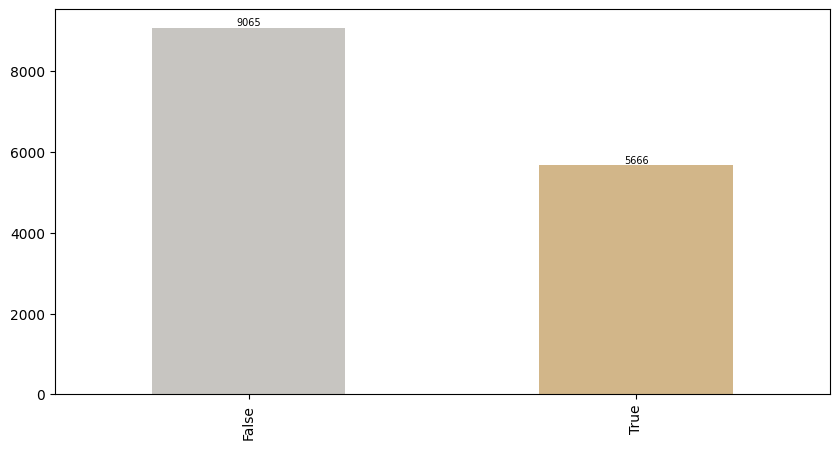

In [253]:
ax=df["Made_Purchase"].value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
plt.savefig('Made_Purchase.png', transparent=True,bbox_inches='tight');

In [254]:
#converting categorical into numerical
labelencoder = LabelEncoder()
df['Made_Purchase'] = labelencoder.fit_transform(df['Made_Purchase'])
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,0


##HomePage                         

In [255]:
df.HomePage.value_counts()

0.0     6977
1.0     1580
2.0     1264
3.0     1114
4.0      882
5.0      700
6.0      485
7.0      385
8.0      303
9.0      252
10.0     180
11.0     111
12.0     101
13.0      60
14.0      56
15.0      41
16.0      22
17.0      20
18.0      14
19.0       7
22.0       7
23.0       6
24.0       3
21.0       3
20.0       3
27.0       1
26.0       1
Name: HomePage, dtype: int64

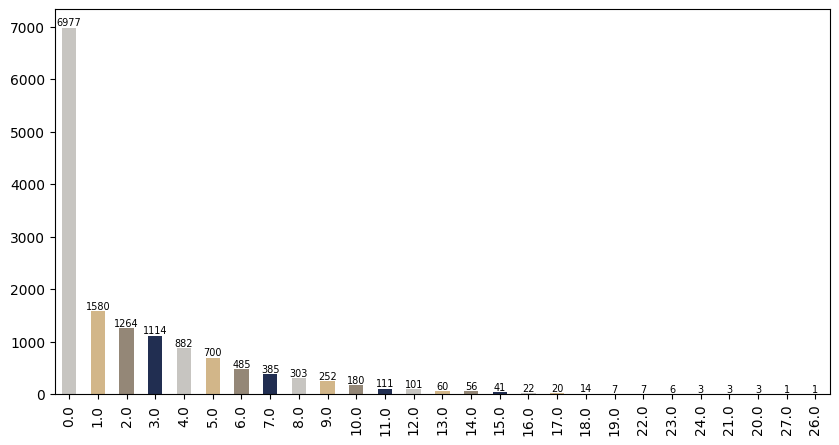

In [256]:
ax=df.HomePage.value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
plt.savefig('HomePage.png', transparent=True,bbox_inches='tight');

The distribution shows that the majority of users visited the homepage between 0 and 6 times, with a gradual decrease in frequency as the number of visits increases. The highest frequency is observed at 0 visits, indicating a significant portion of users who may have navigated directly to other pages or exited the website without visiting the homepage.

##HomePage_Duration

In [257]:
df.HomePage_Duration.value_counts()

0.000000      7130
4.000000        76
5.000000        62
11.000000       55
6.000000        49
              ... 
405.550000       1
101.851111       1
218.966667       1
291.235714       1
168.700000       1
Name: HomePage_Duration, Length: 2844, dtype: int64

In [258]:
df.HomePage_Duration.value_counts().sort_index(ascending=False)

3398.750000       1
2720.500000       1
2657.318056       4
2629.253968       1
2407.423810       2
               ... 
3.500000          5
3.000000         33
2.000000         17
1.333333          3
0.000000       7130
Name: HomePage_Duration, Length: 2844, dtype: int64

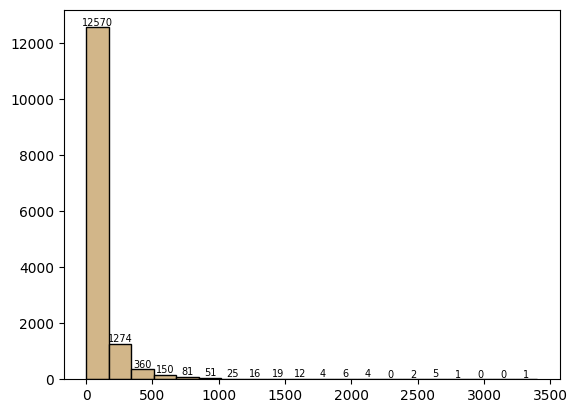

In [259]:
ax = df.HomePage_Duration.hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);
plt.savefig('HomePage_Duration.png', transparent=True,bbox_inches='tight');

In [260]:
pd.DataFrame(df.HomePage_Duration.value_counts())

,HomePage_Duration
0.000000,7130
4.000000,76
5.000000,62
11.000000,55
6.000000,49
...,...
405.550000,1
101.851111,1
218.966667,1
291.235714,1


##LandingPage

In [261]:
df.LandingPage.value_counts()

0.0     11525
1.0      1206
2.0       859
3.0       452
4.0       239
5.0       119
6.0        89
7.0        40
8.0        13
9.0        12
10.0        9
12.0        5
13.0        4
14.0        2
16.0        2
11.0        1
24.0        1
Name: LandingPage, dtype: int64

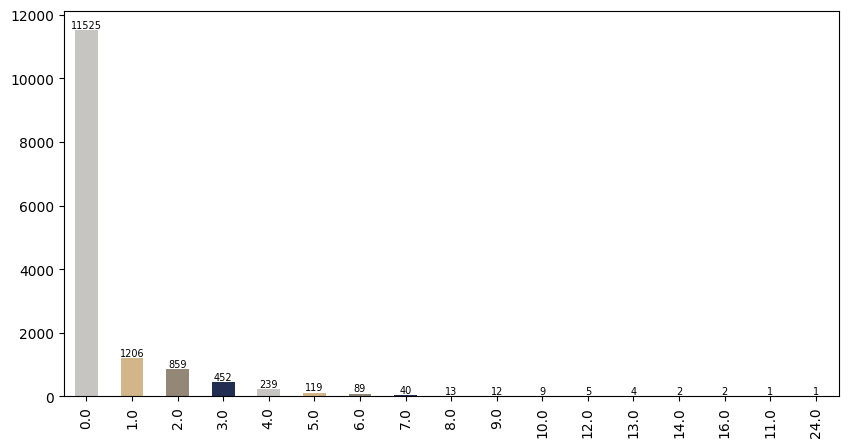

In [262]:
ax=df.LandingPage.value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7)
plt.savefig('LandingPage.png', transparent=True,bbox_inches='tight');

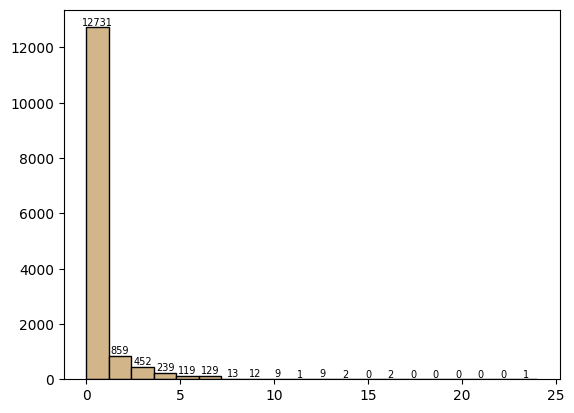

In [263]:
ax = df.LandingPage.hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);

##LandingPage_Duration

In [264]:
df.LandingPage_Duration.value_counts()

0.000000      11804
13.000000        35
10.000000        34
9.000000         33
11.000000        30
              ...  
181.722222        1
147.500000        1
341.333333        1
126.750000        1
103.166667        1
Name: LandingPage_Duration, Length: 1084, dtype: int64

In [265]:
pd.DataFrame(df.LandingPage_Duration.value_counts())

,LandingPage_Duration
0.000000,11804
13.000000,35
10.000000,34
9.000000,33
11.000000,30
...,...
181.722222,1
147.500000,1
341.333333,1
126.750000,1


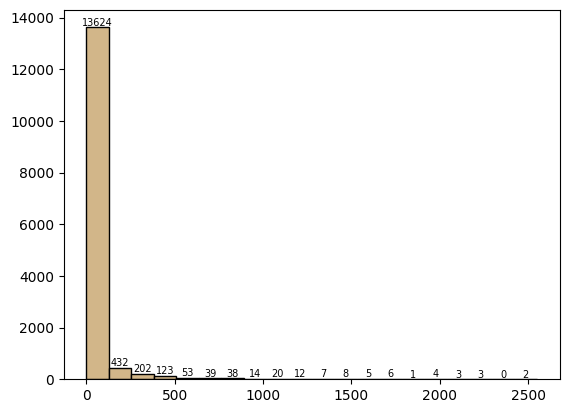

In [266]:
ax = df.LandingPage_Duration.hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('LandingPage_Duration.png', transparent=True,bbox_inches='tight');

The durations vary widely, ranging from as low as 0 seconds to as high as 2549 seconds (roughly 43 minutes). This indicates that users spend varying amounts of time on the landing page.

There are durations where users spend a longer time on the landing page, ranging up to around 2500


##ProductDescriptionPage

In [267]:
df.ProductDescriptionPage.value_counts()

1.0      785
2.0      564
3.0      554
6.0      506
4.0      501
        ... 
423.0      1
275.0      1
225.0      1
517.0      1
374.0      1
Name: ProductDescriptionPage, Length: 294, dtype: int64

In [268]:
pd.DataFrame(df.ProductDescriptionPage.value_counts()).sort_index(ascending=False)

,ProductDescriptionPage
705.0,1
686.0,2
584.0,1
534.0,1
518.0,1
...,...
4.0,501
3.0,554
2.0,564
1.0,785


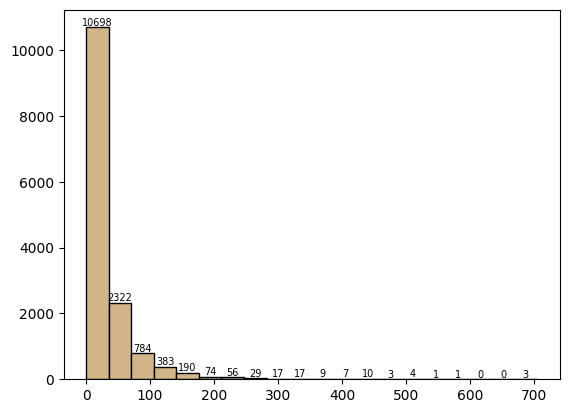

In [269]:
ax = df.ProductDescriptionPage.hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('ProductDescriptionPage.png', transparent=True,bbox_inches='tight');

##ProductDescriptionPage_Duration

In [270]:
df.ProductDescriptionPage_Duration.value_counts()

0.000000       957
17.000000       27
8.000000        21
11.000000       21
7.000000        20
              ... 
1510.383333      1
1475.608427      1
5046.056667      1
269.960000       1
271.716667       1
Name: ProductDescriptionPage_Duration, Length: 7933, dtype: int64

In [271]:
pd.DataFrame(df.ProductDescriptionPage_Duration.value_counts()).sort_index(ascending=False)

,ProductDescriptionPage_Duration
63973.522230,2
43171.233380,1
29970.465970,4
27009.859430,1
24844.156200,1
...,...
2.666667,1
2.333333,2
1.000000,2
0.500000,2


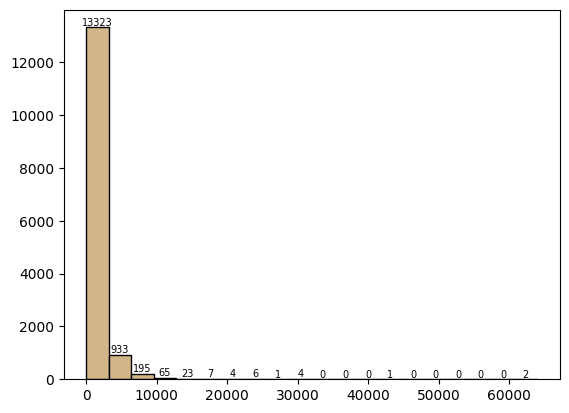

In [272]:
ax = df.ProductDescriptionPage_Duration.hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('ProductDescriptionPage_Duration.png', transparent=True,bbox_inches='tight');

##GoogleMetric:Bounce Rates

In [273]:
df["GoogleMetric:Bounce Rates"].value_counts()

0.000000    6409
0.200000     895
0.066667     160
0.050000     135
0.028571     132
            ... 
0.040351       1
0.080838       1
0.023457       1
0.107692       1
0.068293       1
Name: GoogleMetric:Bounce Rates, Length: 1628, dtype: int64

In [274]:
pd.DataFrame(df['GoogleMetric:Bounce Rates'].value_counts())

,GoogleMetric:Bounce Rates
0.000000,6409
0.200000,895
0.066667,160
0.050000,135
0.028571,132
...,...
0.040351,1
0.080838,1
0.023457,1
0.107692,1


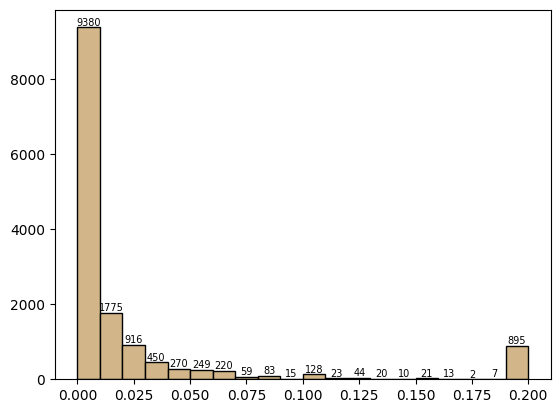

In [275]:
ax = df["GoogleMetric:Bounce Rates"].hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('GoogleMetric:Bounce Rates.png', transparent=True,bbox_inches='tight');

##GoogleMetric:Exit Rates

In [276]:
df["GoogleMetric:Exit Rates"].value_counts()

0.200000    913
0.050000    410
0.100000    404
0.033333    339
0.066667    313
           ... 
0.027551      1
0.071984      1
0.047380      1
0.007912      1
0.070139      1
Name: GoogleMetric:Exit Rates, Length: 4051, dtype: int64

In [277]:
pd.DataFrame(df['GoogleMetric:Exit Rates'].value_counts()).iloc[2000:]

,GoogleMetric:Exit Rates
0.007280,1
0.014604,1
0.007769,1
0.025466,1
0.011280,1
...,...
0.027551,1
0.071984,1
0.047380,1
0.007912,1


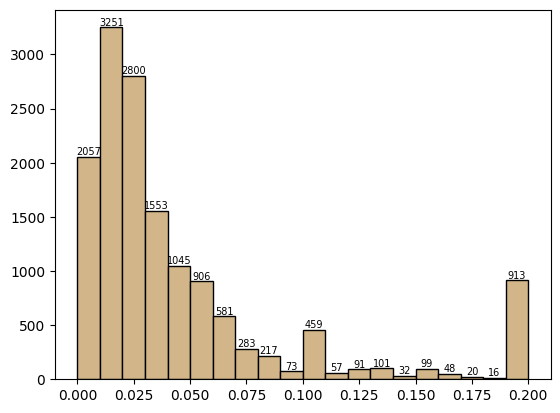

In [278]:
ax = df["GoogleMetric:Exit Rates"].hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('GoogleMetric:Exit Rates.png', transparent=True,bbox_inches='tight');

##GoogleMetric:Page Values

In [279]:
df["GoogleMetric:Page Values"].value_counts()

0.000000     11787
42.293068        5
53.988000        5
14.759436        4
10.485333        4
             ...  
83.101143        1
87.306958        1
2.395283         1
71.488000        1
82.432635        1
Name: GoogleMetric:Page Values, Length: 2120, dtype: int64

In [280]:
pd.DataFrame(df['GoogleMetric:Page Values'].value_counts())

,GoogleMetric:Page Values
0.000000,11787
42.293068,5
53.988000,5
14.759436,4
10.485333,4
...,...
83.101143,1
87.306958,1
2.395283,1
71.488000,1


In [281]:
pd.DataFrame(df['GoogleMetric:Page Values'].value_counts()).sort_index(ascending=False)

,GoogleMetric:Page Values
361.763742,1
360.953384,2
287.953793,1
270.784693,1
255.569158,2
...,...
0.131837,2
0.098621,1
0.093547,1
0.067050,1


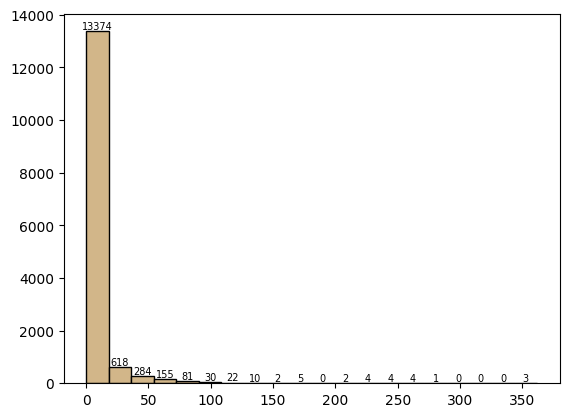

In [282]:
ax = df["GoogleMetric:Page Values"].hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('GoogleMetric:Page Values.png', transparent=True,bbox_inches='tight');

##SeasonalPurchase

In [283]:
df["SeasonalPurchase"].value_counts()

0.0    13034
0.6      427
0.8      398
0.4      313
0.2      218
1.0      191
Name: SeasonalPurchase, dtype: int64

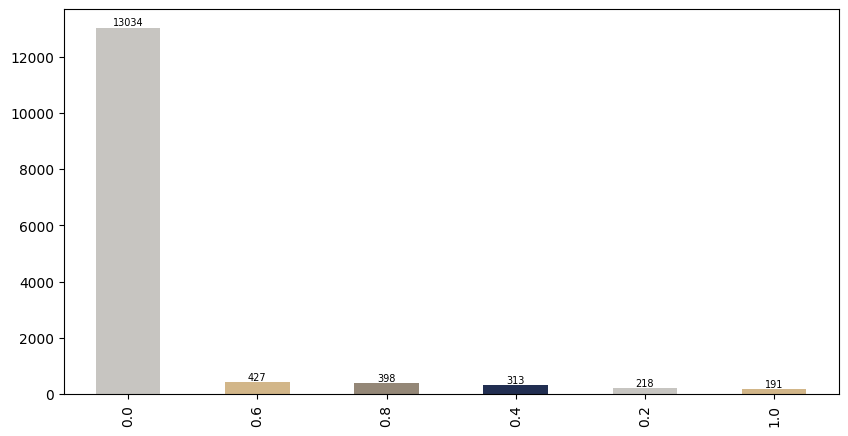

In [284]:
ax = df["SeasonalPurchase"].value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('SeasonalPurchase.png', transparent=True,bbox_inches='tight');

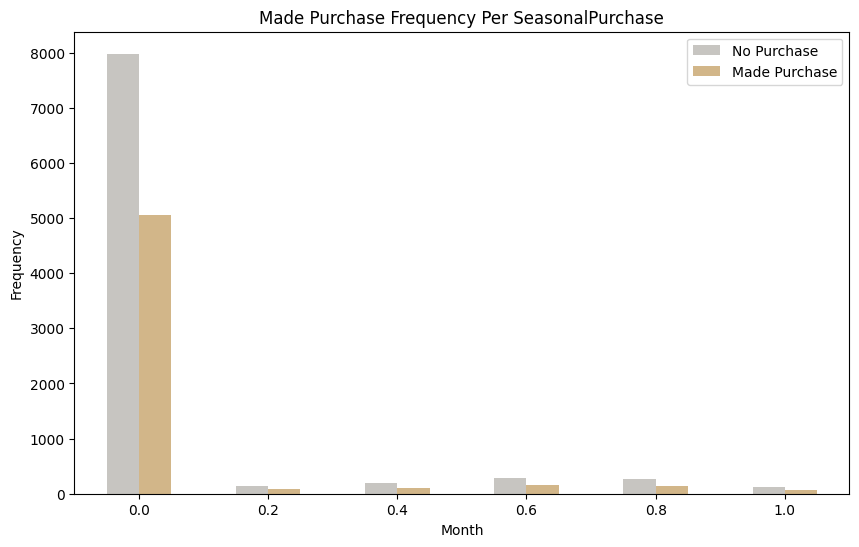

In [285]:
# Make the crosstab more visual
pd.crosstab(df.SeasonalPurchase, df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per SeasonalPurchase")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0);
plt.savefig('Made Purchase Frequency Per SeasonalPurchase.png', transparent=True,bbox_inches='tight');

##Month_SeasonalPurchase

In [286]:
df["Month_SeasonalPurchase"].value_counts()

May     4121
Nov     3439
Mar     2300
Dec     2013
Oct      628
Sep      519
Aug      510
Jul      487
June     349
Feb      221
Name: Month_SeasonalPurchase, dtype: int64

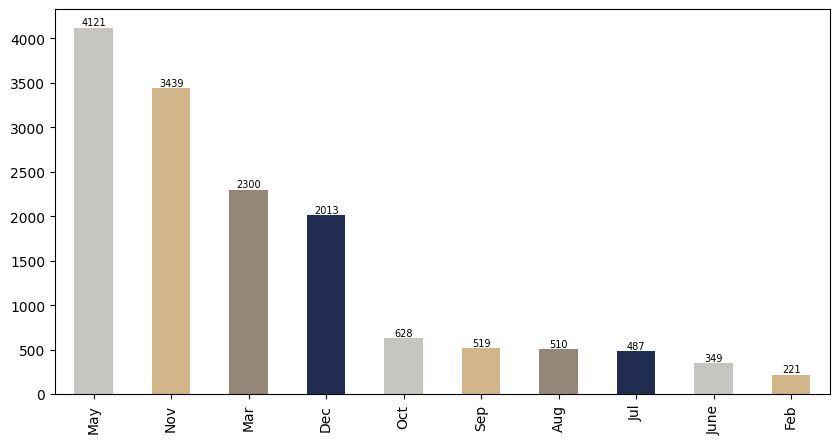

In [287]:
ax = df["Month_SeasonalPurchase"].value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('Month_SeasonalPurchase.png', transparent=True,bbox_inches='tight');

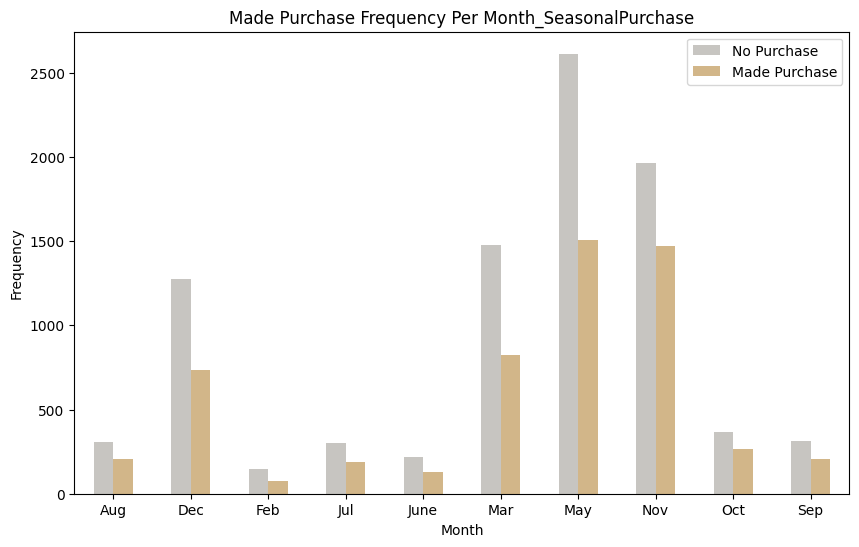

In [288]:
# Make the crosstab more visual
pd.crosstab(df.Month_SeasonalPurchase, df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per Month_SeasonalPurchase")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0)
plt.savefig('Made Purchase Frequency Per Gender.png', transparent=True,bbox_inches='tight');

##OS

Windows ,MacOs ,ChromeOs,Android

In [289]:
df["OS"].value_counts()

2.0    7832
1.0    3072
3.0    2987
4.0     572
8.0      96
6.0      26
7.0       6
5.0       6
Name: OS, dtype: int64

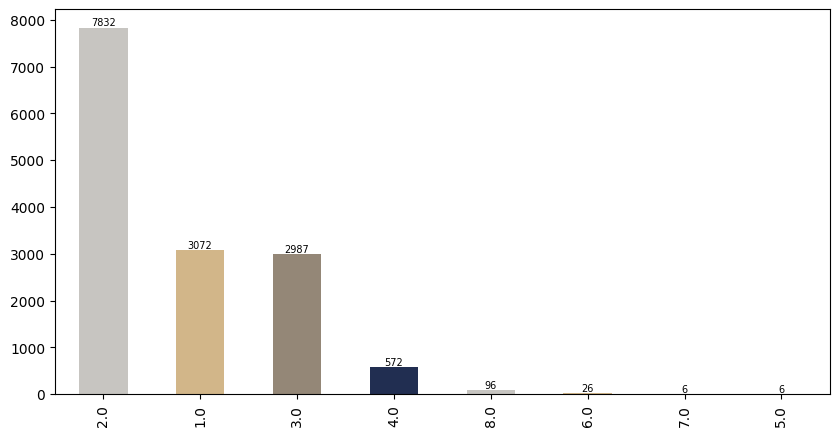

In [290]:
ax = df["OS"].value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7)
ax.grid(False)
plt.savefig('OS.png', transparent=True,bbox_inches='tight');

In [291]:
pd.crosstab(df.OS, df.Made_Purchase)

Made_Purchase,0,1
OS,,
1.0,1909,1163
2.0,4767,3065
3.0,1896,1091
4.0,334,238
5.0,3,3
6.0,17,9
7.0,5,1
8.0,56,40


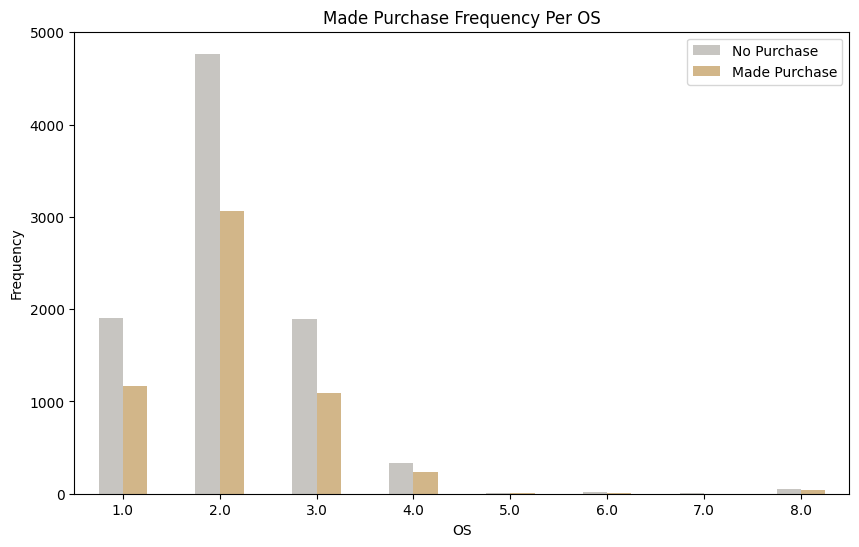

In [292]:
# Make the crosstab more visual
ax=pd.crosstab(df.OS, df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per OS")
plt.xlabel("OS")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0);
plt.savefig('Made Purchase Frequency Per OS.png', transparent=True,bbox_inches='tight');

##SearchEngine

 Google,Bing,yahoo,Ask.com,DuckDuckgo

In [293]:
df["SearchEngine"].value_counts()

2.0     9382
1.0     2959
4.0      879
5.0      539
6.0      211
10.0     200
8.0      154
3.0      127
13.0      73
7.0       69
12.0       9
11.0       6
9.0        1
Name: SearchEngine, dtype: int64

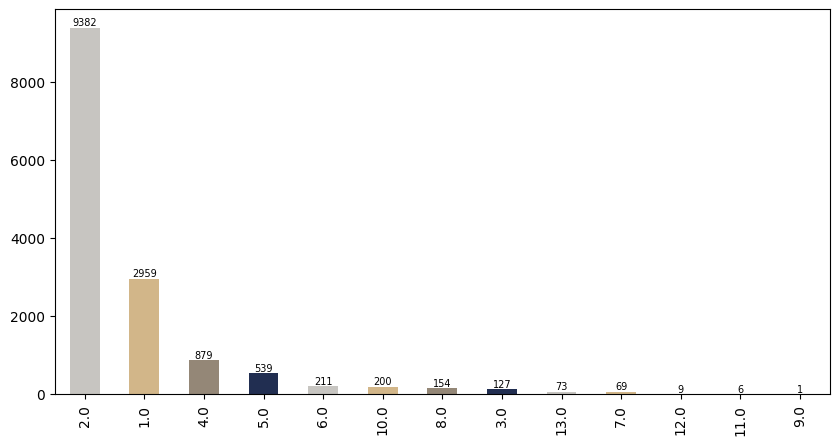

In [294]:
ax = df["SearchEngine"].value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('SearchEngine.png', transparent=True,bbox_inches='tight');

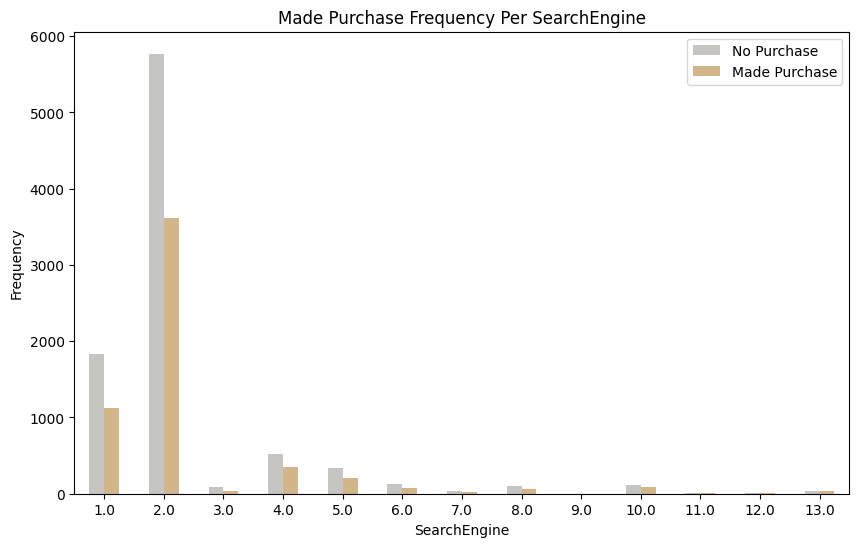

In [295]:
# Make the crosstab more visual
ax=pd.crosstab(df.SearchEngine, df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per SearchEngine")
plt.xlabel("SearchEngine")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0);
plt.savefig('Made Purchase Frequency Per SearchEngine.png', transparent=True,bbox_inches='tight');

##Zone

Middle East, South Asia, North Asia, South Africa, Australia, Canada, North America, South America, Europe

In [296]:
df["Zone"].value_counts()

1.0    5648
3.0    2853
4.0    1374
2.0    1353
6.0     970
7.0     943
9.0     601
8.0     506
5.0     366
Name: Zone, dtype: int64

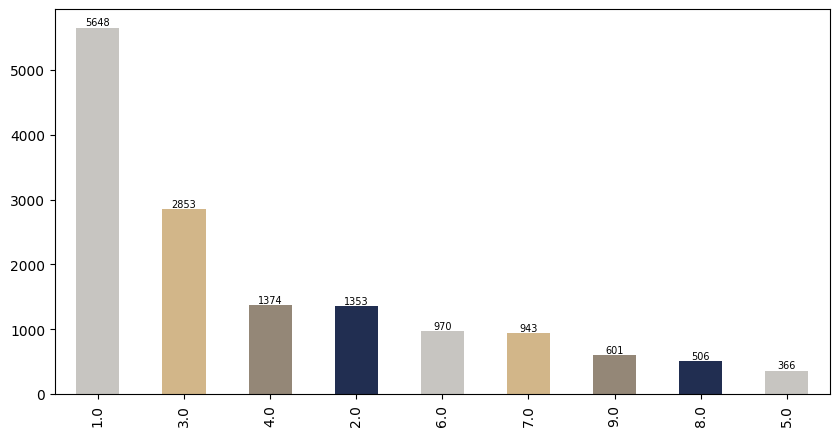

In [297]:
ax = df["Zone"].value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('Zone.png', transparent=True,bbox_inches='tight');

##Type of Traffic

In [298]:
df["Type of Traffic"].value_counts()

2.0     4553
1.0     2919
3.0     2463
4.0     1300
13.0     930
10.0     546
6.0      505
8.0      388
11.0     284
5.0      284
20.0     225
9.0       52
15.0      44
7.0       42
19.0      20
14.0      14
18.0      13
16.0       4
12.0       1
17.0       1
Name: Type of Traffic, dtype: int64

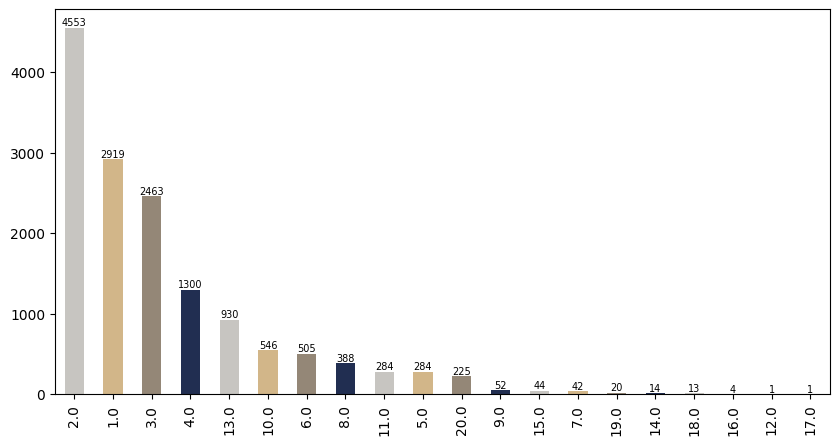

In [299]:
ax = df["Type of Traffic"].value_counts().plot(kind="bar",figsize=(10,5),
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('Type of Traffic.png', transparent=True,bbox_inches='tight');

The majority of traffic comes from Type 2.0, with 4553 instances, followed by Type 1.0 with 2919 instances and Type 3.0 with 2463 instances. There are also notable counts of traffic from Type 4.0, Type 13.0, and Type 10.0, with 1300, 930, and 546 instances respectively. Other types of traffic, such as Type 6.0, Type 8.0, Type 11.0, Type 5.0, Type 20.0, and so on, have varying frequencies ranging from 1 to 505 instances.

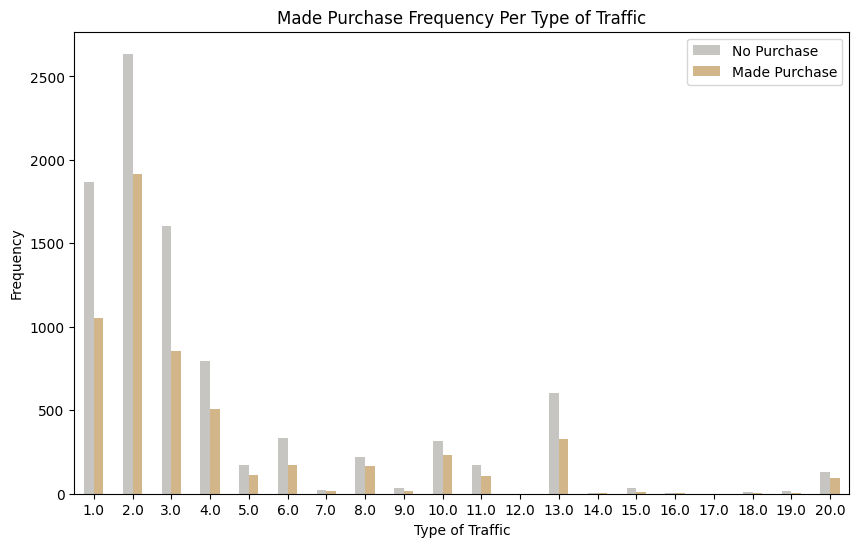

In [300]:
# Make the crosstab more visual
ax=pd.crosstab(df['Type of Traffic'], df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per Type of Traffic")
plt.xlabel("Type of Traffic")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0)
plt.savefig('Made Purchase Frequency Per Type of Traffic.png', transparent=True,bbox_inches='tight');

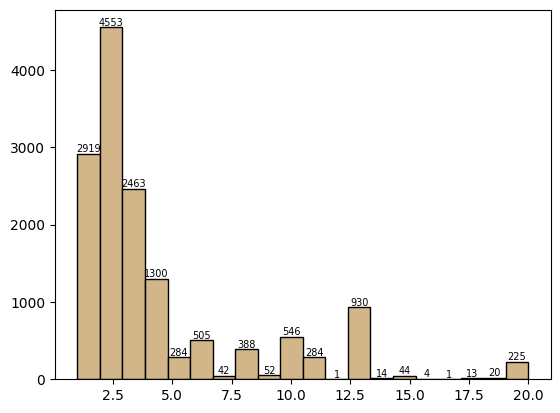

In [301]:
ax = df["Type of Traffic"].hist(bins=20,color=hist_color, edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);

##CustomerType

In [302]:
df["CustomerType"].value_counts()

Returning_Visitor    12550
New_Visitor           1925
Other                  112
Name: CustomerType, dtype: int64

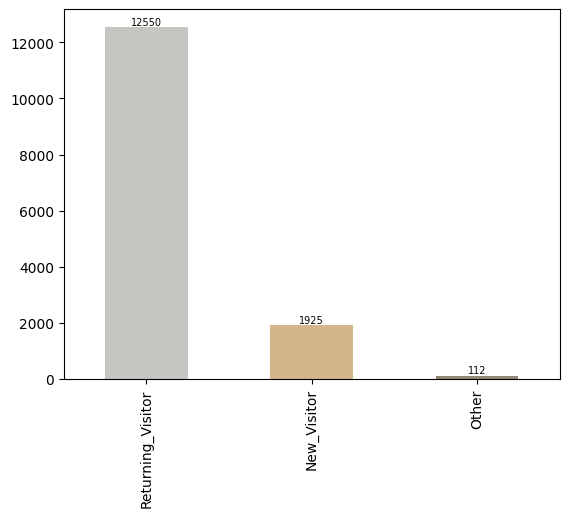

In [303]:
ax = df["CustomerType"].value_counts().plot(kind="bar",
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('CustomerType.png', transparent=True,bbox_inches='tight');

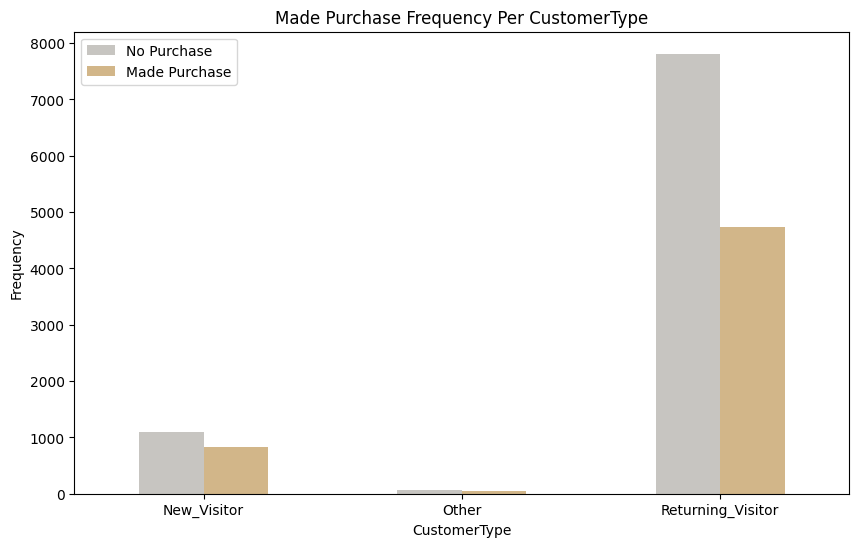

In [304]:
# Make the crosstab more visual
ax=pd.crosstab(df.CustomerType, df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per CustomerType")
plt.xlabel("CustomerType")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0)
plt.savefig('Made Purchase Frequency Per CustomerType.png', transparent=True,bbox_inches='tight');

##Gender

In [305]:
df["Gender"].value_counts()

Not Specified    4971
Female           4829
Male             4786
Name: Gender, dtype: int64

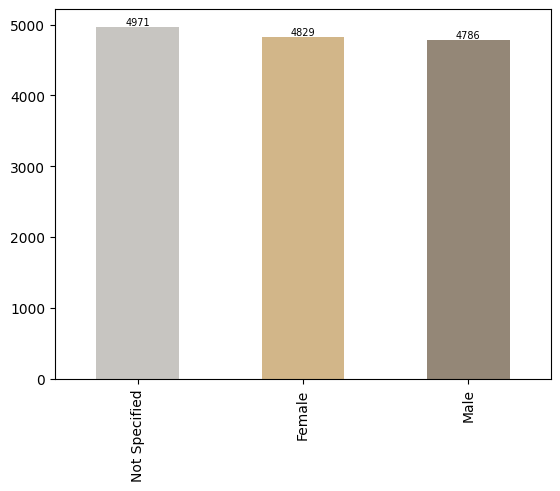

In [306]:
ax = df["Gender"].value_counts().plot(kind="bar",
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('Gender.png', transparent=True,bbox_inches='tight');

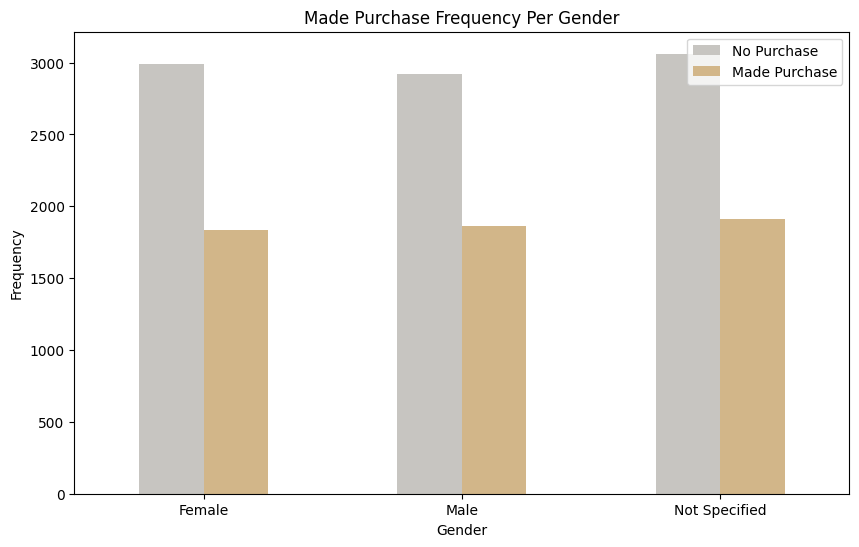

In [307]:
# Make the crosstab more visual
pd.crosstab(df.Gender, df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0)
plt.savefig('Made Purchase Frequency Per Gender.png', transparent=True,bbox_inches='tight');

##Cookies Setting

In [308]:
df["Cookies Setting"].value_counts()

Deny        4964
Required    4867
ALL         4756
Name: Cookies Setting, dtype: int64

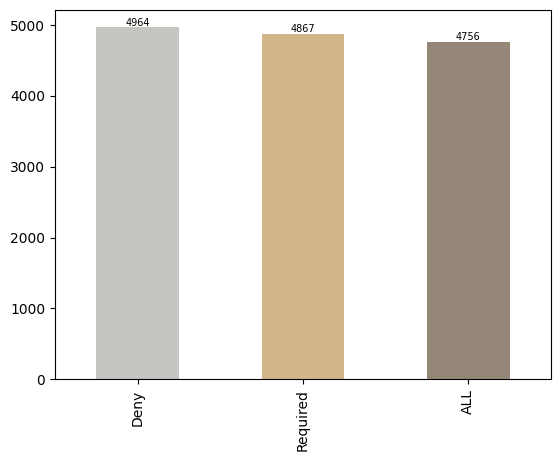

In [309]:
ax = df["Cookies Setting"].value_counts().plot(kind="bar",
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('Cookies Setting.png', transparent=True,bbox_inches='tight');

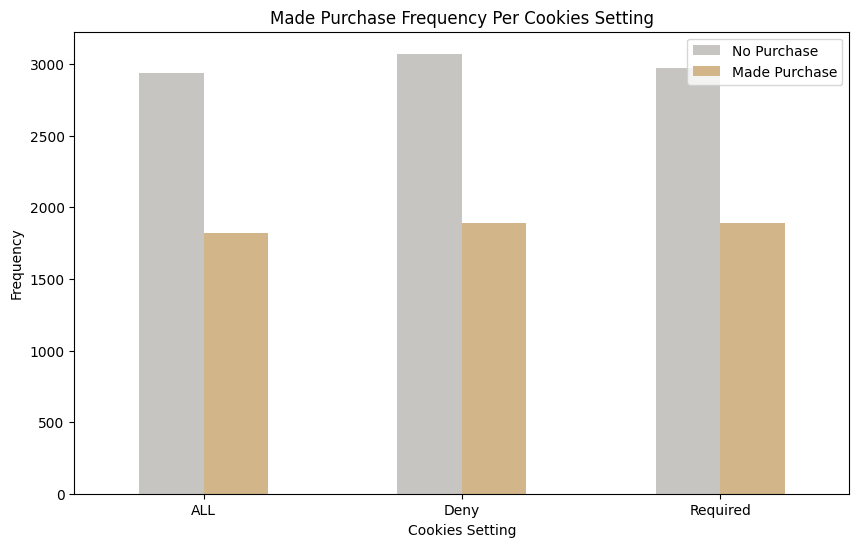

In [310]:
# Make the crosstab more visual
pd.crosstab(df["Cookies Setting"], df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per Cookies Setting")
plt.xlabel("Cookies Setting")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0)
plt.savefig('Made Purchase Frequency Per Cookies Setting.png', transparent=True,bbox_inches='tight');

##Education

In [311]:
df["Education"].value_counts()

Others           3726
Graduate         3691
Diploma          3653
Not Specified    3525
Name: Education, dtype: int64

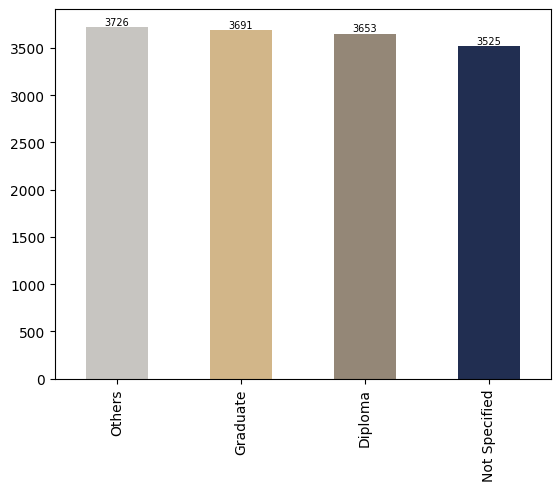

In [312]:
ax = df["Education"].value_counts().plot(kind="bar",
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('Education.png', transparent=True,bbox_inches='tight');

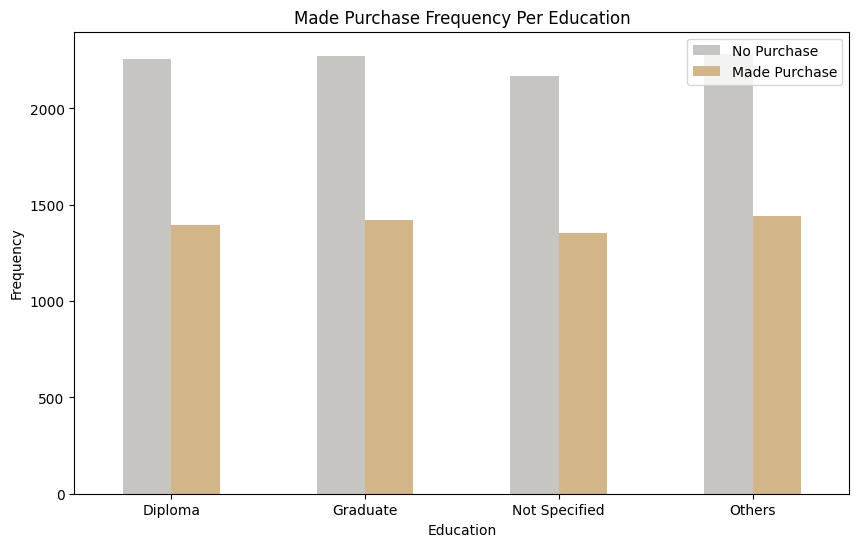

In [313]:
# Make the crosstab more visual
pd.crosstab(df["Education"], df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per Education")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0)
plt.savefig('Made Purchase Frequency Per Education.png', transparent=True,bbox_inches='tight');

##Marital Status

In [314]:
df["Marital Status"].value_counts()

Other      4952
Single     4919
Married    4730
Name: Marital Status, dtype: int64

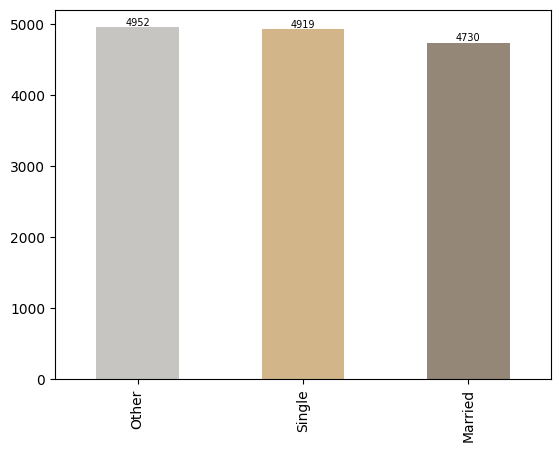

In [315]:
ax = df["Marital Status"].value_counts().plot(kind="bar",
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('Marital Status.png', transparent=True,bbox_inches='tight');

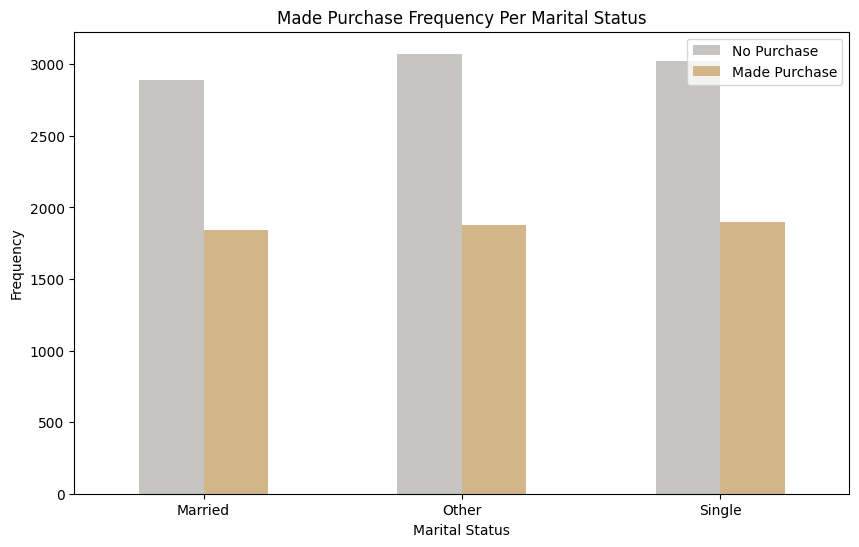

In [316]:
# Make the crosstab more visual
pd.crosstab(df["Marital Status"], df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0)
plt.savefig('Made Purchase Frequency Per Marital Status.png', transparent=True,bbox_inches='tight');

##WeekendPurchase

In [317]:
df["WeekendPurchase"].value_counts()

0.0    11189
1.0     3421
Name: WeekendPurchase, dtype: int64

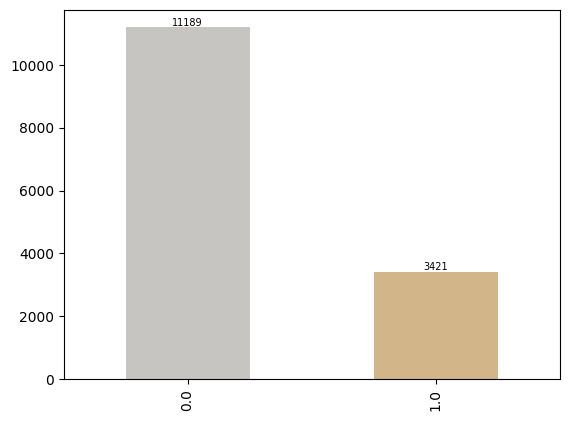

In [318]:
ax = df["WeekendPurchase"].value_counts().plot(kind="bar",
                                   color=ppt_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('WeekendPurchase.png', transparent=True,bbox_inches='tight');

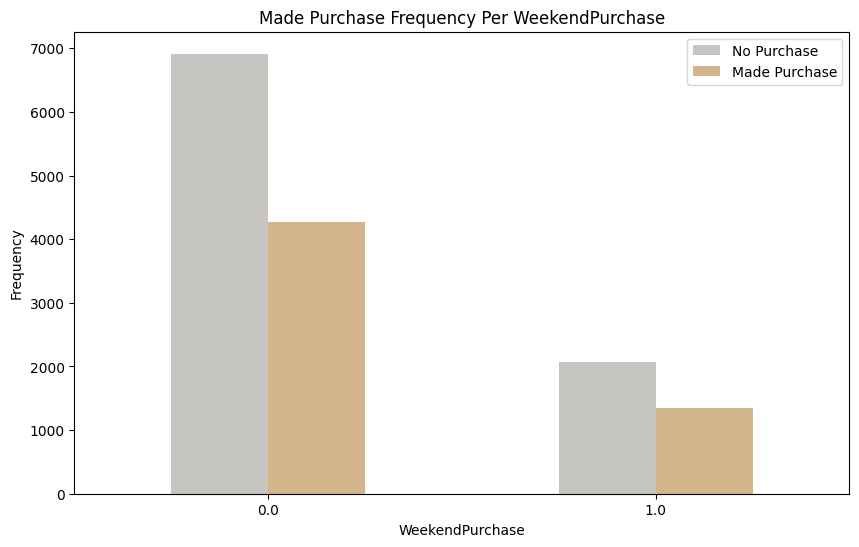

In [319]:
# Make the crosstab more visual
pd.crosstab(df["WeekendPurchase"], df.Made_Purchase).plot(kind="bar",
                                  figsize=(10,6),
                                  color=ppt_color)

# Add some communication
plt.title("Made Purchase Frequency Per WeekendPurchase")
plt.xlabel("WeekendPurchase")
plt.ylabel("Frequency")
plt.legend(["No Purchase","Made Purchase"])
plt.xticks(rotation=0)
plt.savefig('Made Purchase Frequency Per WeekendPurchase.png', transparent=True,bbox_inches='tight');

## Fill Missing Values

In [320]:
# Check the number of empty values
df.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [321]:
# Check rows with missing values
df.loc[df.isnull().any(axis=1)]

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
8615,2.0,115.000000,2.0,NaN,23.0,404.619048,0.000000,0.026000,0.0,0.0,...,1.0,2.0,2.0,Returning_Visitor,Female,Required,Others,Single,0.0,0
8616,0.0,0.000000,0.0,0.0,9.0,396.166667,0.000000,0.022222,0.0,0.0,...,2.0,8.0,13.0,Other,NaN,ALL,Diploma,Single,0.0,0
8617,0.0,0.000000,0.0,0.0,14.0,183.666667,0.000000,NaN,0.0,0.0,...,2.0,3.0,3.0,Returning_Visitor,Male,ALL,Others,Married,0.0,0
8618,0.0,0.000000,0.0,0.0,15.0,NaN,0.000000,0.026667,0.0,0.0,...,5.0,6.0,3.0,Returning_Visitor,Female,Required,Graduate,Single,0.0,0
8619,0.0,0.000000,0.0,0.0,1.0,NaN,0.000000,0.100000,0.0,0.8,...,2.0,3.0,3.0,Returning_Visitor,Not Specified,ALL,Others,Single,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,0.0,0.000000,0.0,NaN,13.0,598.500000,0.000000,0.016667,0.0,0.0,...,10.0,7.0,2.0,New_Visitor,Female,Required,Diploma,Married,0.0,1
14716,0.0,0.000000,1.0,0.0,11.0,185.666667,0.050000,0.083333,0.0,0.0,...,2.0,1.0,1.0,NaN,Not Specified,Deny,Diploma,Other,0.0,1
14720,3.0,11.333333,0.0,0.0,20.0,302.388889,0.000000,0.002381,0.0,0.0,...,2.0,1.0,1.0,Returning_Visitor,Not Specified,ALL,NaN,Single,0.0,1
14723,0.0,0.000000,0.0,0.0,5.0,47.000000,0.000000,NaN,0.0,0.0,...,2.0,3.0,3.0,Returning_Visitor,Not Specified,ALL,Not Specified,Other,0.0,1


In [322]:
# Check device brands that have missing values
df.loc[df.isnull().any(axis=1)]['HomePage'].value_counts()

0.0     1340
1.0      308
3.0      234
2.0      213
4.0      158
5.0      145
6.0       87
7.0       78
9.0       56
8.0       40
10.0      27
11.0      25
12.0      20
13.0       8
16.0       5
14.0       5
15.0       5
23.0       4
17.0       3
18.0       3
22.0       3
21.0       1
20.0       1
26.0       1
Name: HomePage, dtype: int64

In [323]:
# Check rows that have missing values in  column
df.loc[df['HomePage'].isnull()]

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
8627,NaN,14.20,2.0,133.0,13.0,825.799048,0.040000,0.041667,14.839782,0.0,...,2.0,4.0,2.0,Returning_Visitor,Male,Required,Diploma,Single,0.0,0
8699,NaN,0.00,0.0,0.0,5.0,72.500000,0.000000,0.040000,0.000000,0.0,...,6.0,6.0,3.0,Returning_Visitor,Male,Deny,Not Specified,Married,0.0,0
8743,NaN,0.00,0.0,0.0,10.0,416.583333,0.000000,0.036667,0.000000,0.0,...,1.0,3.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Other,0.0,0
8760,NaN,313.00,2.0,0.0,49.0,2382.428571,0.022642,0.048228,5.513346,0.0,...,2.0,1.0,4.0,Returning_Visitor,Not Specified,Deny,Diploma,Other,1.0,0
8779,NaN,198.50,2.0,158.0,6.0,73.214286,0.000000,0.020000,0.000000,0.0,...,1.0,1.0,2.0,Returning_Visitor,Male,Required,Graduate,Other,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14292,NaN,0.00,0.0,0.0,17.0,132.633333,0.011765,0.007843,0.000000,0.0,...,1.0,1.0,2.0,Returning_Visitor,Female,ALL,Not Specified,Other,0.0,1
14383,NaN,8.00,0.0,0.0,28.0,643.875000,0.000000,0.003571,0.000000,0.6,...,4.0,1.0,2.0,New_Visitor,Male,Deny,Diploma,Other,0.0,1
14542,NaN,0.00,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,1.0,1.0,3.0,Returning_Visitor,Not Specified,Deny,Others,Other,0.0,1
14597,NaN,113.25,2.0,38.5,92.0,4066.207476,0.001754,0.013604,18.041148,0.0,...,6.0,6.0,13.0,Returning_Visitor,Female,Deny,Others,Married,1.0,1


In [324]:
# Fill missing numeric with median
for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
        df[label].fillna(df[label].median(),inplace=True)

In [325]:
# Check the number of empty values
df.isna().sum()

HomePage                             0
HomePage_Duration                    0
LandingPage                          0
LandingPage_Duration                 0
ProductDescriptionPage               0
ProductDescriptionPage_Duration      0
GoogleMetric:Bounce Rates            0
GoogleMetric:Exit Rates              0
GoogleMetric:Page Values             0
SeasonalPurchase                     0
Month_SeasonalPurchase             144
OS                                   0
SearchEngine                         0
Zone                                 0
Type of Traffic                      0
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                      0
Made_Purchase                        0
dtype: int64

In [326]:
df['HomePage_Duration'].fillna(df['HomePage_Duration'].median(),inplace=True)
# Check HomePage_Duration that have missing values
df.loc[df['HomePage_Duration'].isnull()]

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase


In [327]:
#df.groupby(['HomePage_Duration'])['HomePage'].apply(lambda x:x.fillna(x.median()))

In [328]:
# HomePage_Duration
#df['HomePage']=df.groupby(['HomePage_Duration'])['HomePage'].transform(lambda x:x.fillna(x.median()))

In [329]:
df.loc[df['HomePage'].isnull()]

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase


In [330]:
df.loc[df['HomePage'].isnull()]

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase


## Categorical to Numerical

In [331]:
# Check columns which are not numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Month_SeasonalPurchase
CustomerType
Gender
Cookies Setting
Education
Marital Status


In [332]:
# Turn categorical variables into numbers and fill missing with -1
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [333]:
# Check the number of empty values
df.isna().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
OS                                 0
SearchEngine                       0
Zone                               0
Type of Traffic                    0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
Made_Purchase                      0
dtype: int64

## Correlation Matrix

In [334]:
# Make a correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
HomePage,1.000000,0.591903,0.367016,0.257662,0.433437,0.368491,-0.223026,-0.315653,0.106737,-0.083050,...,-0.022954,-0.000119,-0.036326,-0.037072,-0.032735,0.013510,-0.001435,-0.022195,0.026097,0.051696
HomePage_Duration,0.591903,1.000000,0.302498,0.256283,0.300768,0.368053,-0.142568,-0.203639,0.067820,-0.066697,...,-0.024003,-0.006785,-0.020012,-0.030713,-0.023380,0.009878,-0.001930,-0.003079,0.025296,0.041892
LandingPage,0.367016,0.302498,1.000000,0.611020,0.372868,0.386897,-0.117425,-0.164674,0.051707,-0.044710,...,-0.032707,-0.033225,-0.032173,0.048487,-0.031079,0.010402,0.002727,-0.008619,0.038891,0.042454
LandingPage_Duration,0.257662,0.256283,0.611020,1.000000,0.300094,0.392916,-0.074636,-0.104284,0.037985,-0.030861,...,-0.014227,-0.036268,-0.020086,0.039125,-0.012755,0.007933,-0.001435,-0.015860,0.027864,0.027119
ProductDescriptionPage,0.433437,0.300768,0.372868,0.300094,1.000000,0.840990,-0.206368,-0.293969,0.059769,-0.010964,...,-0.007216,-0.042387,-0.040214,0.108986,-0.022329,-0.003097,-0.017332,-0.014900,0.014569,0.068305
ProductDescriptionPage_Duration,0.368491,0.368053,0.386897,0.392916,0.840990,1.000000,-0.179199,-0.243746,0.054499,-0.028674,...,-0.003335,-0.036480,-0.029743,0.103132,-0.028660,0.006373,-0.014485,-0.021632,0.004587,0.065958
GoogleMetric:Bounce Rates,-0.223026,-0.142568,-0.117425,-0.074636,-0.206368,-0.179199,1.000000,0.902575,-0.107578,0.067816,...,-0.016617,-0.008671,0.079934,0.123906,0.012624,-0.002384,0.025814,0.014618,-0.043280,-0.053184
GoogleMetric:Exit Rates,-0.315653,-0.203639,-0.164674,-0.104284,-0.293969,-0.243746,0.902575,1.000000,-0.157874,0.095960,...,-0.008195,-0.014048,0.082371,0.161696,0.015707,-0.002656,0.032165,0.013885,-0.059993,-0.070874
GoogleMetric:Page Values,0.106737,0.067820,0.051707,0.037985,0.059769,0.054499,-0.107578,-0.157874,1.000000,-0.055272,...,0.045968,0.020821,0.009897,-0.084638,-0.004942,0.005988,-0.018929,-0.018990,0.004104,0.204012
SeasonalPurchase,-0.083050,-0.066697,-0.044710,-0.030861,-0.010964,-0.028674,0.067816,0.095960,-0.055272,1.000000,...,0.008898,-0.017188,0.041591,0.073534,0.001760,0.002763,0.015869,-0.017544,-0.014986,-0.017852


In [335]:
ppt_cmap=matplotlib.colors.LinearSegmentedColormap.from_list('ppt',ppt)

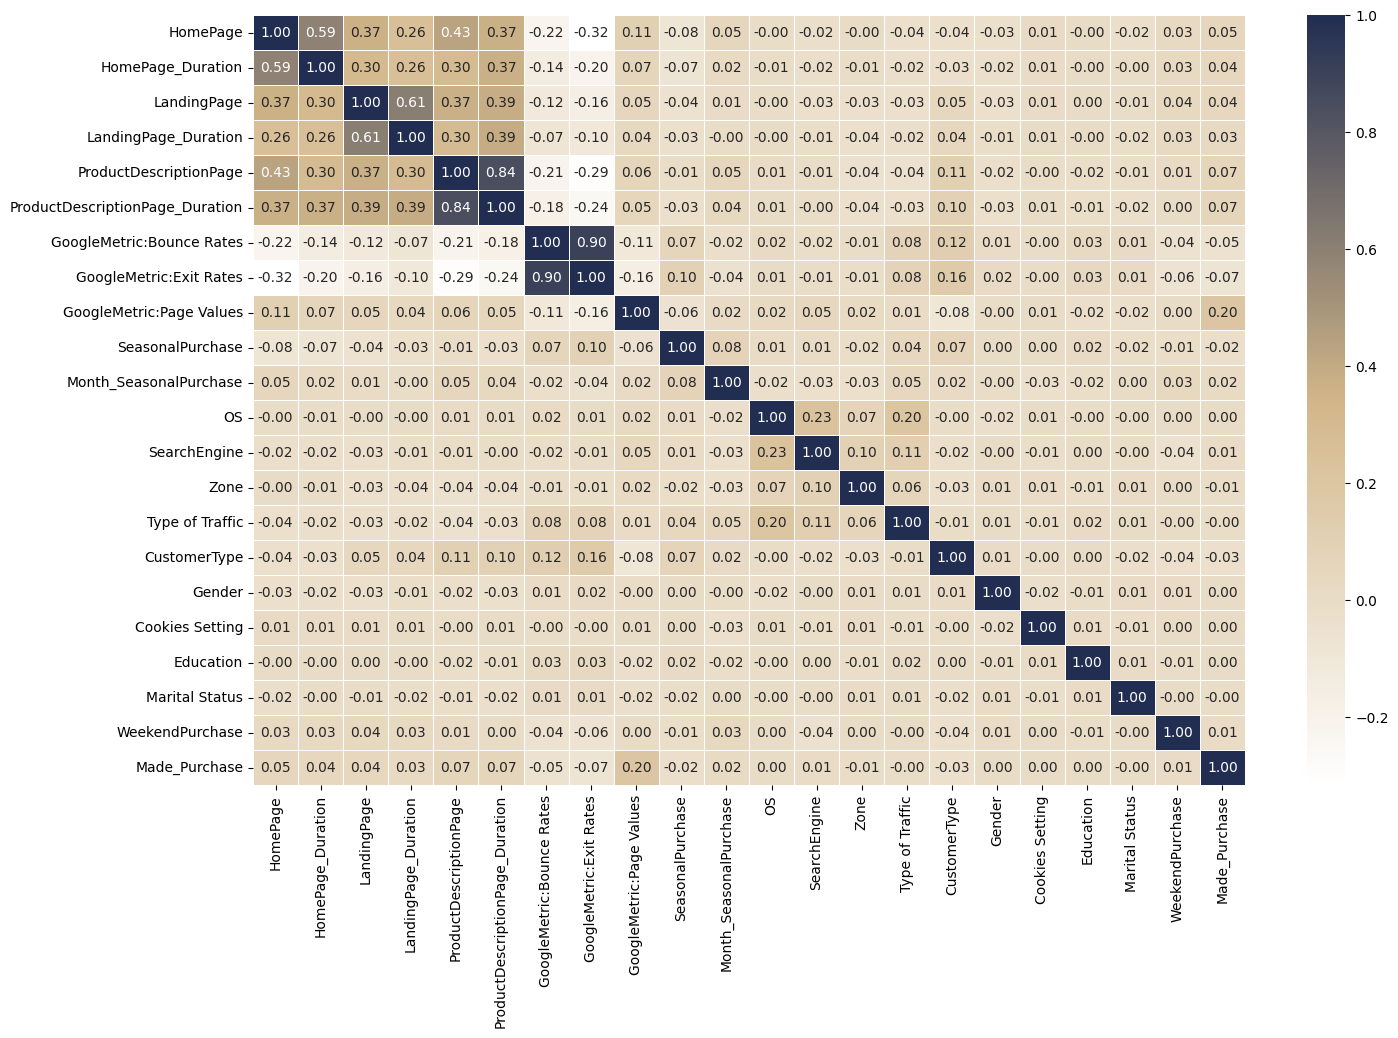

In [336]:
# Make the correlation matrix a little prettier
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap=ppt_cmap)
plt.savefig('Correlation.png', transparent=True,bbox_inches='tight');

## Outliers


Removing some outliers reduced model scores, so outliers were kept

In [118]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

HomePage                              3.000000
HomePage_Duration                    90.000000
LandingPage                           0.000000
LandingPage_Duration                  0.000000
ProductDescriptionPage               30.000000
ProductDescriptionPage_Duration    1242.361248
GoogleMetric:Bounce Rates             0.017647
GoogleMetric:Exit Rates               0.035333
GoogleMetric:Page Values              0.000000
SeasonalPurchase                      0.000000
Month_SeasonalPurchase                3.000000
OS                                    1.000000
SearchEngine                          0.000000
Zone                                  3.000000
Type of Traffic                       2.000000
CustomerType                          0.000000
Gender                                2.000000
Cookies Setting                       2.000000
Education                             3.000000
Marital Status                        2.000000
WeekendPurchase                       0.000000
Made_Purchase

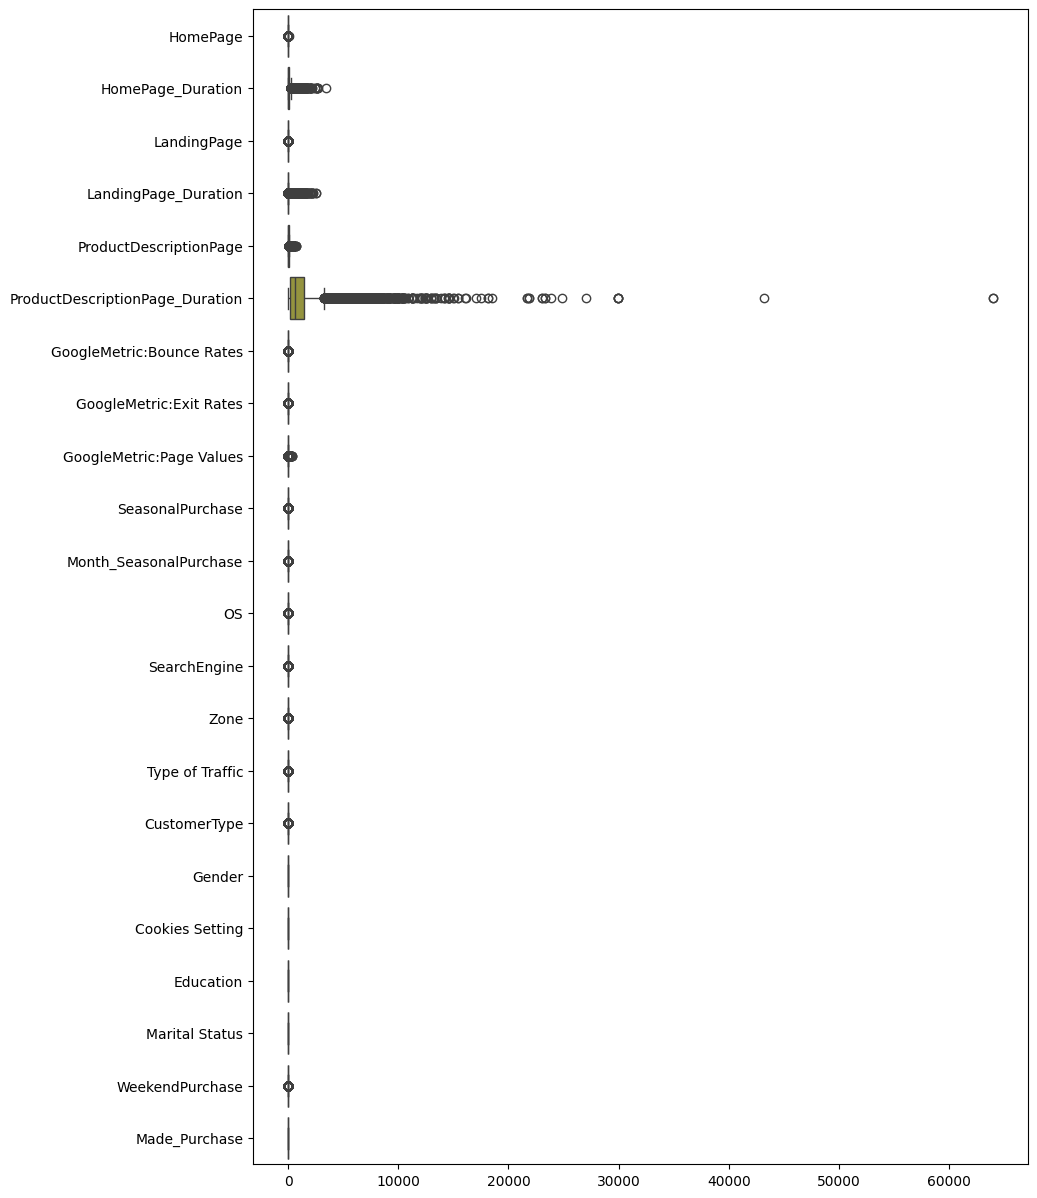

In [119]:
plt.figure(figsize = (10,15))
sns.boxplot(df,orient='h',palette=customPalette)
plt.savefig('Boxplot.png', transparent=True,bbox_inches='tight');

In [120]:

#removing outliers
#data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
#data.shape

(1979, 22)

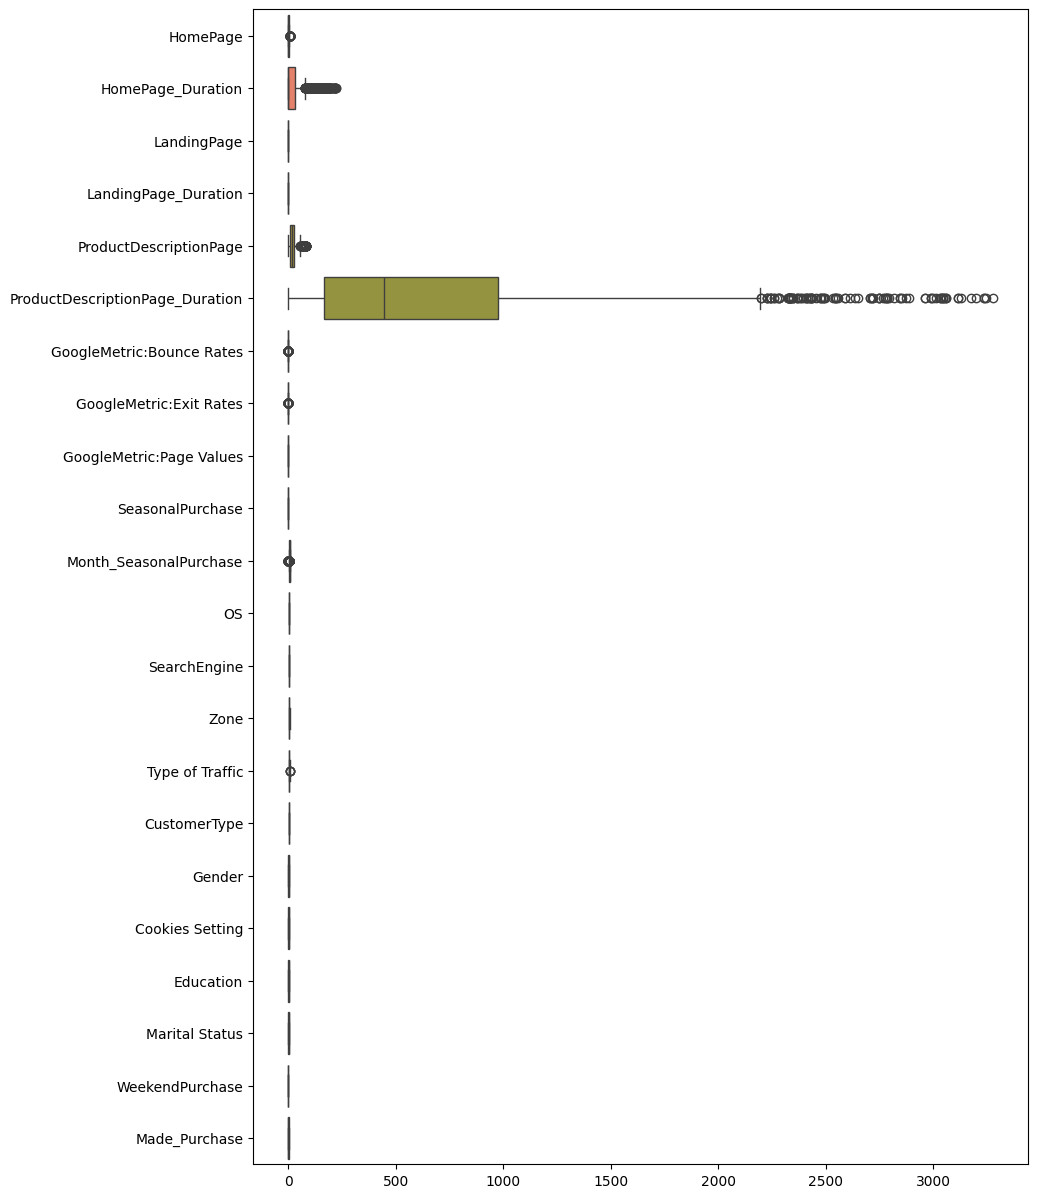

In [121]:
#plt.figure(figsize = (10,15))
#sns.boxplot(data,orient='h',palette=customPalette);

## Split data into train and test sets

In [337]:
# Split data into X and y
X = df.drop('Made_Purchase', axis=1)
y = df['Made_Purchase']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [338]:
X_train.shape, X_test.shape

((11784, 21), (2947, 21))

In [108]:
X_train

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
2435,0.0,0.000000,0.0,0.00,36.0,472.666667,0.075676,0.100511,0.000000,0.8,...,3.0,2.0,7.0,13.0,2,1,0,1,2,0.0
8743,1.0,0.000000,0.0,0.00,10.0,416.583333,0.000000,0.036667,0.000000,0.0,...,1.0,1.0,3.0,2.0,2,2,0,1,1,0.0
14646,6.0,104.113636,3.0,95.00,95.0,2411.789279,0.000000,0.010683,16.784202,0.0,...,3.0,2.0,5.0,6.0,2,2,1,0,1,0.0
13117,6.0,90.416667,0.0,0.00,5.0,100.416667,0.000000,0.020000,0.000000,0.0,...,1.0,2.0,6.0,8.0,0,2,1,1,1,0.0
10489,11.0,88.375000,1.0,0.00,17.5,3230.546573,0.000000,0.017862,15.384330,0.0,...,1.0,1.0,7.0,2.0,2,2,1,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,10.0,148.900000,0.0,0.00,25.0,692.220000,0.038710,0.039355,0.000000,0.0,...,1.0,1.0,7.0,1.0,2,2,2,3,0,1.0
13418,3.0,38.166667,0.0,0.00,5.0,77.666667,0.000000,0.012500,0.000000,0.0,...,1.0,1.0,5.0,3.0,2,1,0,0,0,0.0
5390,4.0,75.100000,0.0,0.00,7.0,102.700000,0.000000,0.011111,0.000000,0.0,...,2.0,4.0,6.0,2.0,2,1,1,0,0,0.0
860,0.0,0.000000,0.0,0.00,3.0,67.500000,0.000000,0.066667,0.000000,0.0,...,1.0,1.0,3.0,3.0,2,2,1,2,0,1.0


##Scaling

In [339]:
#standardising data
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

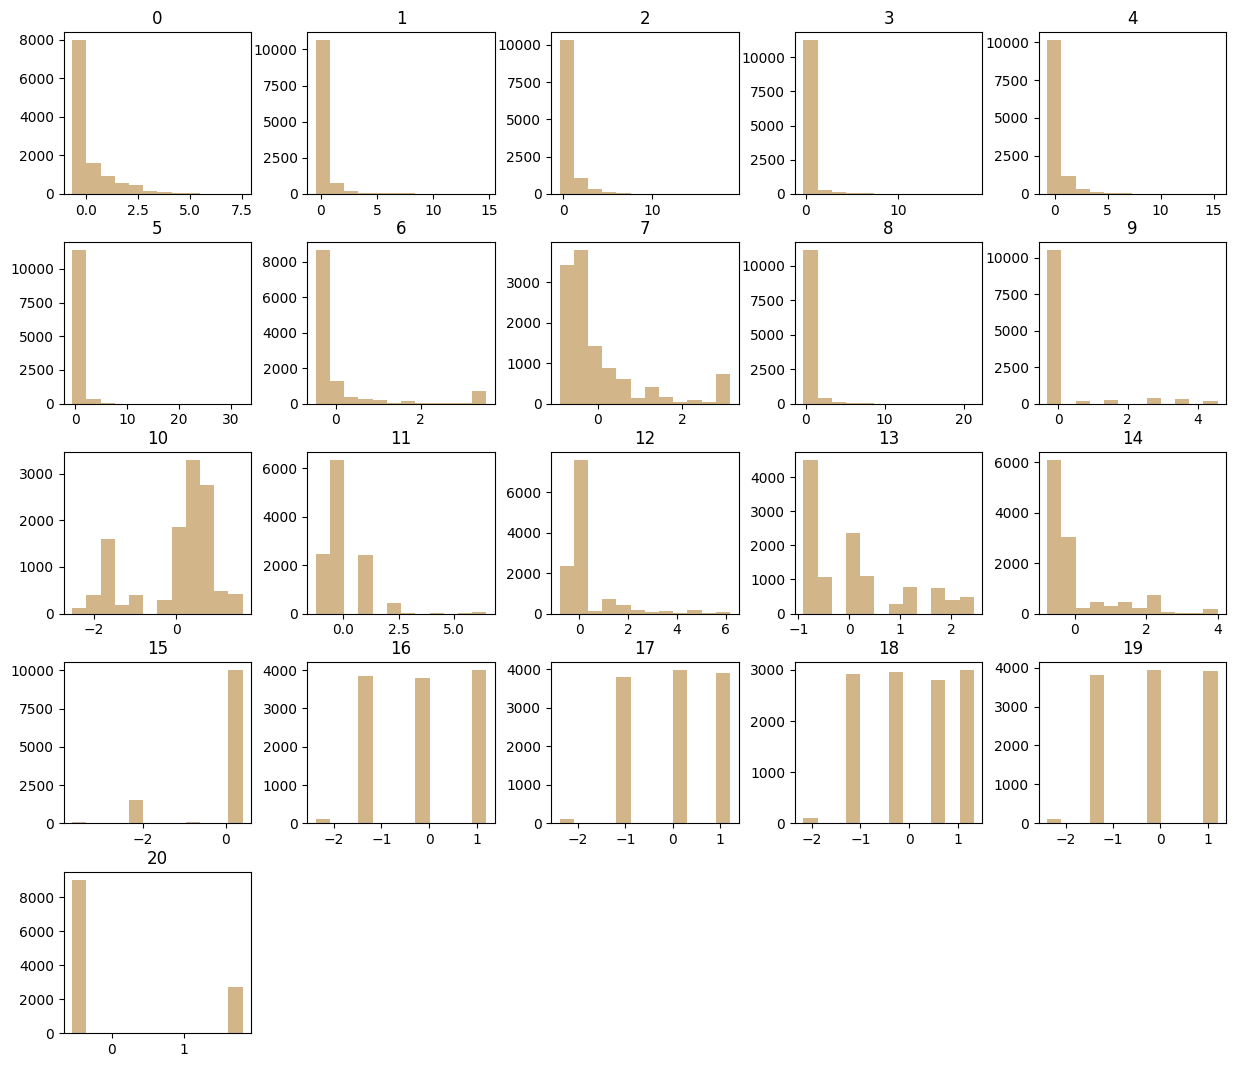

In [236]:
ax=pd.DataFrame(X_train).hist(figsize=(15,13),
                                  color=hist_color,
                              grid=False,
                              bins=12
                             )
plt.savefig('standardscaler.png', transparent=True,bbox_inches='tight');

##PCA

PCA gave poorer scores, so I did not use it.

In [341]:
#Principal Component Analysis
#pca = PCA(n_components=10)
#principalComponents_train = pca.fit_transform(X_train)#not taking PCA as it is lowering the accuracy
#principalComponents_test = pca.fit_transform(X_test)
principalComponents_train = (X_train)
principalComponents_test = (X_test)


In [342]:
principalComponents_train

array([[-0.68090504, -0.43925051, -0.38616956, ..., -0.41990474,
         1.2127233 , -0.55042101],
       [-0.37722686, -0.43925051, -0.38616956, ..., -0.41990474,
         0.00969852, -0.55042101],
       [ 1.14116407,  0.14130717,  2.01226094, ..., -1.29336589,
         0.00969852, -0.55042101],
       ...,
       [ 0.5338077 , -0.02047845, -0.38616956, ..., -1.29336589,
        -1.19332626, -0.55042101],
       [-0.68090504, -0.43925051, -0.38616956, ...,  0.45355641,
        -1.19332626,  1.81679111],
       [ 2.05219863,  0.91715832,  2.01226094, ...,  0.45355641,
         0.00969852, -0.55042101]])

## Modeling

### RandomForest

In [426]:
# Train model
random_forest = RandomForestClassifier(max_depth=10,min_samples_split= 10,
 n_estimators=300, random_state=42)
random_forest.fit(principalComponents_train, y_train);

#### Training Set

In [391]:
#Calcuate accuracy of on training data
acc_random_forest = round(random_forest.score(principalComponents_train, y_train) * 100, 2)
print(f"accuracy on the training data: {acc_random_forest}")

accuracy on the training data: 70.09


In [392]:
# Confusion matrix
predictions = random_forest.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6875,  305],
       [3220, 1384]])

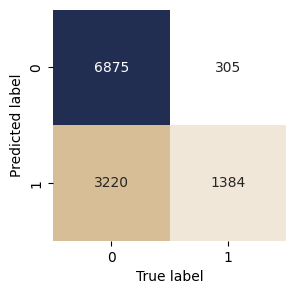

In [393]:
#sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g',
                     cmap=ppt_cmap)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")


plot_conf_mat(y_train, predictions)

In [118]:
# Classification report
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.681     0.958     0.796      7180
           1      0.819     0.301     0.440      4604

    accuracy                          0.701     11784
   macro avg      0.750     0.629     0.618     11784
weighted avg      0.735     0.701     0.657     11784



#### Test set

In [344]:
#random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
#random_forest.fit(principalComponents_test, y_test)
acc_random_forest_test = round(random_forest.score(principalComponents_test, y_test) * 100, 2)
print(f"accuracy on the test data:{acc_random_forest_test}")

accuracy on the test data:68.65


In [345]:
predictions = random_forest.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1736,  149],
       [ 775,  287]])

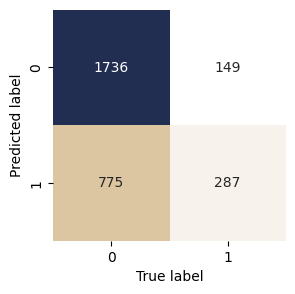

In [121]:
#
plot_conf_mat(y_test, predictions)

In [122]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.691     0.921     0.790      1885
           1      0.658     0.270     0.383      1062

    accuracy                          0.686      2947
   macro avg      0.675     0.596     0.586      2947
weighted avg      0.679     0.686     0.643      2947



In [269]:
from sklearn.metrics import precision_score
# calculate prediction
precision = precision_score(y_test, predictions, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.658


In [270]:
from sklearn.metrics import recall_score
# calculate recall
recall = recall_score(y_test, predictions, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.270


In [271]:
# calculate score
score = f1_score(y_test, predictions, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.383


In [347]:

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.596


#### ROC Curve

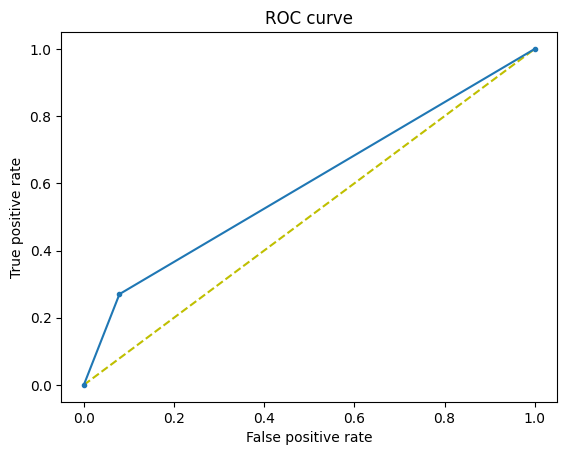

In [139]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


####Cross Validation

In [427]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline

# create model
random_forest = RandomForestClassifier(max_depth=10,min_samples_split= 10,
 n_estimators=300, random_state=42)

### The right part ###
# define the pipeline to include scaling and the model.
#This pipeline will be the input to cross_val_score, instead of the model.
#steps = list()
#steps.append(('scaler', StandardScaler()))
#steps.append(('model', random_forest))
#pipeline = Pipeline(steps=steps)
pipeline=random_forest

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)


# evaluate model
cv_scores = cross_val_score(pipeline, principalComponents_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

for score in cv_scores:
    print("Accuracy for this fold is: ", score)

# Mean accuracy
print(' Mean accuracy over all folds is: ', (np.mean(cv_scores)))

Accuracy for this fold is:  0.6347051336444633
Accuracy for this fold is:  0.6745863385659737
Accuracy for this fold is:  0.666525243954179
Accuracy for this fold is:  0.6431904963937208
Accuracy for this fold is:  0.6460101867572157
 Mean accuracy over all folds is:  0.6530034798631105


In [124]:
#from sklearn.metrics import classification_report, accuracy_score, make_scorer
#from sklearn.metrics import roc_auc_score
## Variables for average classification report
#originalclass = []
#predictedclass = []
#
###Make our customer score
#def classification_report_with_accuracy_score(y_true, y_pred):
#    originalclass.extend(y_true)
#    predictedclass.extend(y_pred)
#    return accuracy_score(y_true, y_pred) # return #accuracy score
#
##outer_cv = KFold(n_splits=5, shuffle=True, #random_state=42)
#
### Nested CV with parameter optimization
#nested_score = cross_val_score(pipeline, X=principalComponents_train, y=y_train, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))
#
### Average values in classification report for all folds #in a K-fold Cross-validation
#print(classification_report(originalclass, predictedclass))





In [428]:
# Cross-validated accuracy
cv_acc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="accuracy", n_jobs=-1)
cv_acc

array([0.63470513, 0.67458634, 0.66652524, 0.6431905 , 0.64601019])

In [429]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6530034798631105

In [276]:
# Cross-validated precision
cv_precision = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="precision", n_jobs=-1)
print(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

[0.62582781 0.65940054 0.64835165 0.6728972  0.63733333]


0.6487621074950657

In [277]:
# Cross-validated recall
cv_recall = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="recall", n_jobs=-1)
print(cv_recall)
cv_recall = np.mean(cv_recall)
cv_recall

[0.20170758 0.27375566 0.2639821  0.22689076 0.25506937]


0.24428109260496772

In [278]:
# Cross-validated f1-score
cv_f1 = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="f1", n_jobs=-1)
print(cv_f1)
cv_f1 = np.mean(cv_f1)
cv_f1

[0.30508475 0.38689049 0.37519873 0.33935585 0.36432927]


0.35417181642451434

In [285]:
#cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=['Tuned Random forest'])
cv_metrics

,Accuracy,Precision,Recall,F1
Tuned Random forest,0.653003,0.648762,0.244281,0.354172


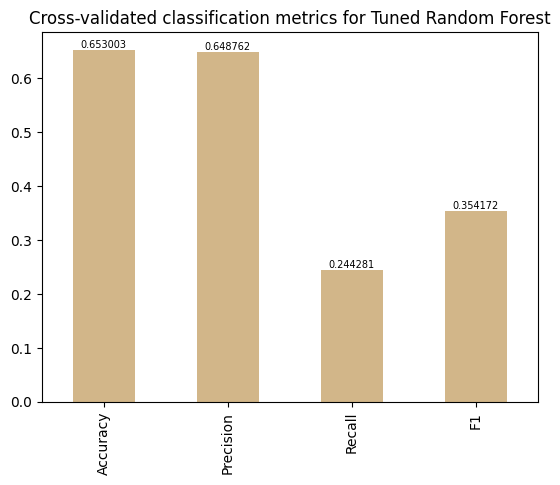

In [286]:
# Visualize cross-validated metrics

ax=cv_metrics.T.plot.bar(title="Cross-validated classification metrics for Tuned Random Forest",
                      legend=False,color=hist_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False)
plt.savefig('Cross-validated classification metrics for Random Forest.png', transparent=True,bbox_inches='tight');


In [430]:
# Cross-validated auc-score
cv_auc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="roc_auc", n_jobs=-1)
print(cv_auc)
cv_auc = np.mean(cv_auc)
print('AUC: %.3f' % cv_auc)

[0.49822704 0.55813658 0.54001844 0.53946178 0.52603747]
AUC: 0.532


#### Hyperparameter Tuning

In [132]:
#%%time
#from sklearn.model_selection import GridSearchCV
## Create the parameter grid based on the results of random search
#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 200, 300, 1000]
#}
## Create a base model
#rf = RandomForestClassifier()
## Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                          cv = 3, n_jobs = -1, verbose = 3)
## Fit the grid search to the data
#grid_search.fit(principalComponents_train, y_train)


In [133]:
#grid_search.best_params_

Train model with the best hyperparameters

In [134]:
%%time

# Most ideal hyperparametrs
ideal_model = RandomForestClassifier(bootstrap= True,
 max_depth= 100,
 max_features= 2,
 min_samples_leaf= 5,
 min_samples_split= 12,
 n_estimators= 1000)
# Fit the ideal model
ideal_model.fit(principalComponents_train, y_train)

CPU times: user 12.2 s, sys: 117 ms, total: 12.3 s
Wall time: 12.4 s


RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=1000)

In [135]:
#Calcuate accuracy on training data
acc_ideal_random_forest_train = round(ideal_model.score(principalComponents_train, y_train) * 100, 2)
print(f"accuracy on the training data: {acc_ideal_random_forest_train}")

accuracy on the training data: 72.1


In [136]:
# Test ideal model
acc_ideal_random_forest_test = round(ideal_model.score(principalComponents_test, y_test) * 100, 2)
print(f"accuracy on the test data:{acc_ideal_random_forest_test}")

accuracy on the test data:67.73


In [137]:
# Cross-validated accuracy
ideal_cv_acc = cross_val_score(ideal_model,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="accuracy")
ideal_cv_acc

array([0.62791684, 0.6644039 , 0.65549427, 0.63173526, 0.63242784])

In [138]:
ideal_cv_acc = np.mean(ideal_cv_acc)
ideal_cv_acc

0.642395623915469

In [140]:
import pandas as pd
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds'])

Ideal threshold is:  1    1
Name: thresholds, dtype: int64


####Default parameters

In [262]:
# Train with default param
random_forest_default = RandomForestClassifier( random_state=42)
random_forest_default.fit(principalComponents_train, y_train);

In [263]:
#Calcuate accuracy of on training data
acc_random_forest_default = round(random_forest_default.score(principalComponents_train, y_train) * 100, 2)
print(f"accuracy on the training data: {acc_random_forest_default}")

accuracy on the training data: 84.28


In [264]:
#Calcuate accuracy of on test data
acc_random_forest_default_test = round(random_forest_default.score(principalComponents_test, y_test) * 100, 2)
print(f"accuracy on the test data:{acc_random_forest_default_test}")

accuracy on the test data:53.75


### GaussianNB

####Training Set

In [348]:
gaussian = GaussianNB(var_smoothing= 0.23101297000831597)
gaussian.fit(principalComponents_train, y_train)
gaussian.score(principalComponents_train, y_train)
acc_gaussian = round(gaussian.score(principalComponents_train, y_train) * 100, 2)
print(acc_gaussian)

63.56


In [349]:
predictions = gaussian.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6481,  699],
       [3595, 1009]])

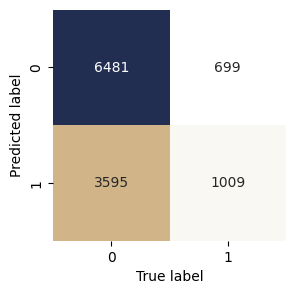

In [144]:
plot_conf_mat(y_train, predictions)

In [145]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.643     0.903     0.751      7180
           1      0.591     0.219     0.320      4604

    accuracy                          0.636     11784
   macro avg      0.617     0.561     0.535     11784
weighted avg      0.623     0.636     0.583     11784



#### Test set

In [350]:
gaussian.score(principalComponents_test, y_test)
acc_gaussian_test = round(gaussian.score(principalComponents_test, y_test) * 100, 2)
print(acc_gaussian_test)

66.68


In [352]:
predictions = gaussian.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1716,  169],
       [ 813,  249]])

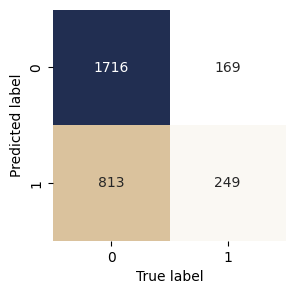

In [148]:
plot_conf_mat(y_test, predictions)

In [149]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.679     0.910     0.778      1885
           1      0.596     0.234     0.336      1062

    accuracy                          0.667      2947
   macro avg      0.637     0.572     0.557      2947
weighted avg      0.649     0.667     0.619      2947



In [353]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.572


####ROC Curve

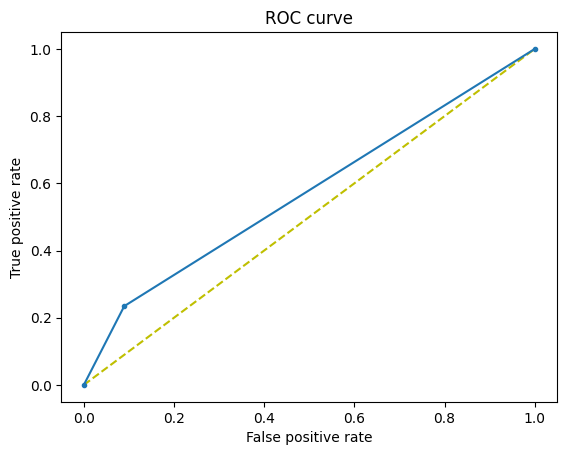

In [150]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

####Cross Validation

In [405]:
# create model
gaussian = GaussianNB()
### The right part ###
# define the pipeline to include scaling and the model.
#This pipeline will be the input to cross_val_score, instead of the model.
#steps = list()
#steps.append(('scaler', StandardScaler()))
#steps.append(('model', gaussian))
#pipeline = Pipeline(steps=steps)
pipeline = gaussian

# cv is already defined previously
#cv = KFold(n_splits=5, random_state=42, shuffle=True)


# evaluate model
cv_scores = cross_val_score(pipeline, principalComponents_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

for score in cv_scores:
    print("Accuracy for this fold is: ", score)

# Mean accuracy
print(' Mean accuracy over all folds is: ', (np.mean(cv_scores)))

Accuracy for this fold is:  0.6257955027577429
Accuracy for this fold is:  0.6440390326686466
Accuracy for this fold is:  0.6359779380568519
Accuracy for this fold is:  0.6270683071701315
Accuracy for this fold is:  0.6370967741935484
 Mean accuracy over all folds is:  0.6339955109693842


In [298]:
# Cross-validated accuracy
cv_acc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="accuracy",
                         n_jobs=-1)
cv_acc

array([0.6257955 , 0.64403903, 0.63597794, 0.62706831, 0.63709677])

In [299]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6339955109693842

In [300]:
# Cross-validated precision
cv_precision = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="precision",
                         n_jobs=-1)
print(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

[0.58258258 0.55319149 0.54663212 0.59102244 0.60098522]


0.5748827723723535

In [301]:
# Cross-validated recall
cv_recall = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="recall", n_jobs=-1)
print(cv_recall)
cv_recall = np.mean(cv_recall)
cv_recall

[0.20704376 0.26470588 0.2360179  0.24894958 0.26040555]


0.24342453311465762

In [302]:
# Cross-validated f1-score
cv_f1 = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="f1", n_jobs=-1)
print(cv_f1)
cv_f1 = np.mean(cv_f1)
cv_f1

[0.30551181 0.35807192 0.3296875  0.35033259 0.3633656 ]


0.34139388501828727

In [303]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=['GaussianNB'])
cv_metrics

,Accuracy,Precision,Recall,F1
GaussianNB,0.633996,0.574883,0.243425,0.341394


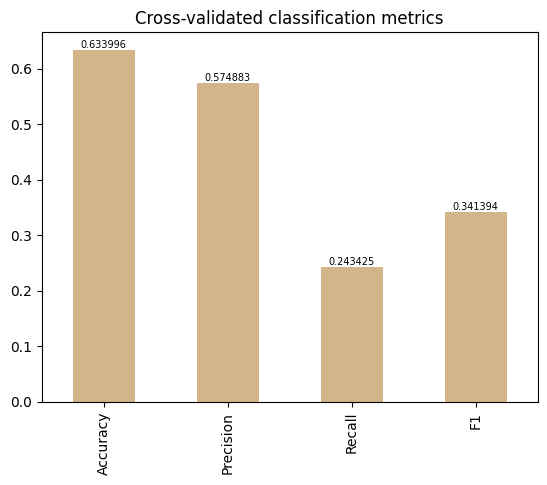

In [304]:
# Visualize cross-validated metrics

ax=cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False,color=hist_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);


In [406]:
# Cross-validated auc-score
cv_auc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="roc_auc", n_jobs=-1)
print(cv_auc)
cv_auc = np.mean(cv_auc)
print('AUC: %.3f' % cv_auc)

[0.57854931 0.59783225 0.59669078 0.58911114 0.59908221]
AUC: 0.592


### LogisticRegression

####Training set

In [354]:
logreg = LogisticRegression()
logreg.fit(principalComponents_train, y_train)
acc_log = round(logreg.score(principalComponents_train, y_train) * 100, 2)
print(acc_log)

65.15


In [348]:
predictions = logreg.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6834,  346],
       [3761,  843]])

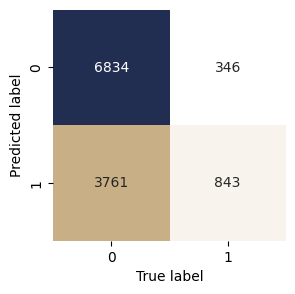

In [349]:
plot_conf_mat(y_train, predictions)

In [350]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.645     0.952     0.769      7180
           1      0.709     0.183     0.291      4604

    accuracy                          0.651     11784
   macro avg      0.677     0.567     0.530     11784
weighted avg      0.670     0.651     0.582     11784



####Test set

In [355]:
acc_log_test = round(logreg.score(principalComponents_test, y_test) * 100, 2)
print(acc_log_test)

68.04


In [356]:
predictions = logreg.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1806,   79],
       [ 863,  199]])

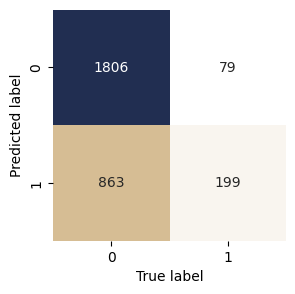

In [164]:
plot_conf_mat(y_test, predictions)

In [353]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.677     0.958     0.793      1885
           1      0.716     0.187     0.297      1062

    accuracy                          0.680      2947
   macro avg      0.696     0.573     0.545      2947
weighted avg      0.691     0.680     0.614      2947



In [358]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.573


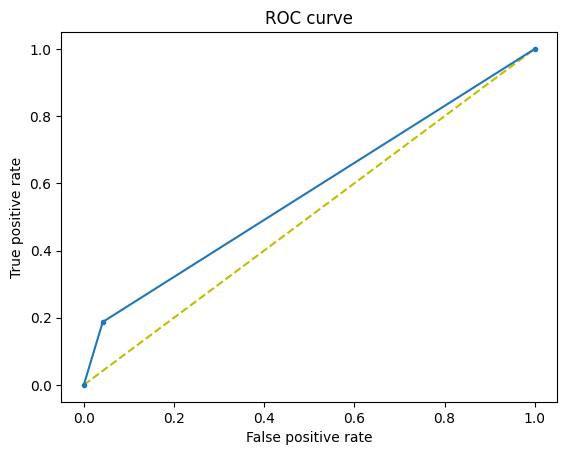

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

####Feature Importance

In [166]:
logreg.coef_

array([[-0.02826694,  0.01740503,  0.03188528, -0.03890278,  0.07796014,
         0.03637614, -0.02535514, -0.00526871,  0.60245116,  0.00518155,
         0.03253765, -0.01541105, -0.00180059, -0.02227732, -0.00655773,
        -0.04867999,  0.02144004,  0.00684161,  0.02358998,  0.00852497,
         0.01176062]])

In [167]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(logreg.coef_[0])))
feature_dict

{'HomePage': -0.028266944276537646,
 'HomePage_Duration': 0.01740502751415611,
 'LandingPage': 0.03188527993522007,
 'LandingPage_Duration': -0.03890278223860712,
 'ProductDescriptionPage': 0.07796014207168445,
 'ProductDescriptionPage_Duration': 0.036376140235667064,
 'GoogleMetric:Bounce Rates': -0.025355142802431608,
 'GoogleMetric:Exit Rates': -0.005268709361619162,
 'GoogleMetric:Page Values': 0.602451156574731,
 'SeasonalPurchase': 0.005181551660480582,
 'Month_SeasonalPurchase': 0.03253765384429778,
 'OS': -0.01541105124651596,
 'SearchEngine': -0.0018005877505018314,
 'Zone': -0.022277317672785926,
 'Type of Traffic': -0.006557727356540762,
 'CustomerType': -0.048679985058215844,
 'Gender': 0.021440044036385997,
 'Cookies Setting': 0.006841608521899665,
 'Education': 0.02358998148557804,
 'Marital Status': 0.00852496579156845,
 'WeekendPurchase': 0.01176062024278077}

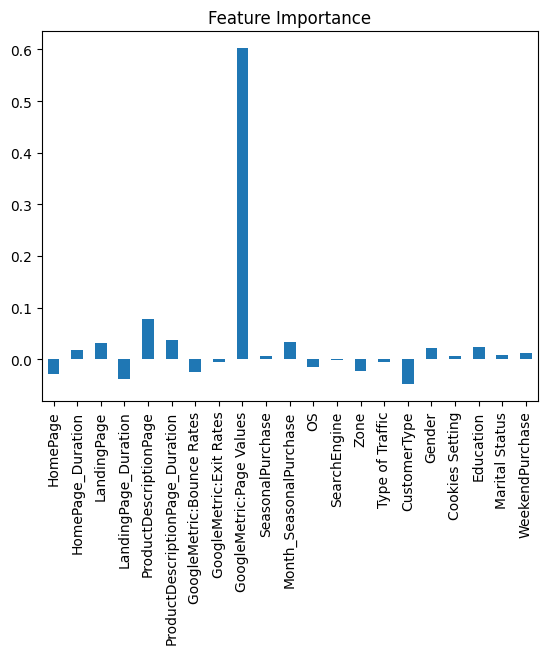

In [168]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

####Cross Validation

In [407]:
# create model
logreg = LogisticRegression()
### The right part ###
# define the pipeline to include scaling and the model.
#This pipeline will be the input to cross_val_score, instead of the model.
#steps = list()
#steps.append(('scaler', StandardScaler()))
#steps.append(('model', gaussian))
#pipeline = Pipeline(steps=steps)
pipeline = logreg

# cv is already defined previously
#cv = KFold(n_splits=5, random_state=42, shuffle=True)


# evaluate model
cv_scores = cross_val_score(pipeline, principalComponents_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

for score in cv_scores:
    print("Accuracy for this fold is: ", score)

# Mean accuracy
print(' Mean accuracy over all folds is: ', (np.mean(cv_scores)))

Accuracy for this fold is:  0.638947815019092
Accuracy for this fold is:  0.6661009758167161
Accuracy for this fold is:  0.6661009758167161
Accuracy for this fold is:  0.6347051336444633
Accuracy for this fold is:  0.6443123938879457
 Mean accuracy over all folds is:  0.6500334588369866


In [306]:
# Cross-validated accuracy
cv_acc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="accuracy", n_jobs=-1)
cv_acc

array([0.63894782, 0.66610098, 0.66610098, 0.63470513, 0.64431239])

In [307]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6500334588369866

In [308]:
# Cross-validated precision
cv_precision = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="precision", n_jobs=-1)
print(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

[0.70873786 0.69019608 0.71836735 0.6969697  0.68539326]


0.6999328489688963

In [309]:
# Cross-validated recall
cv_recall = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="recall", n_jobs=-1)
print(cv_recall)
cv_recall = np.mean(cv_recall)
cv_recall

[0.15581644 0.19909502 0.19686801 0.16911765 0.19530416]


0.18324025525677698

In [310]:
# Cross-validated f1-score
cv_f1 = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="f1", n_jobs=-1)
print(cv_f1)
cv_f1 = np.mean(cv_f1)
cv_f1

[0.25546807 0.30904302 0.30904302 0.27218935 0.30398671]


0.2899460333907747

In [312]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=['Logistic Regression'])
cv_metrics

,Accuracy,Precision,Recall,F1
Logistic Regression,0.650033,0.699933,0.18324,0.289946


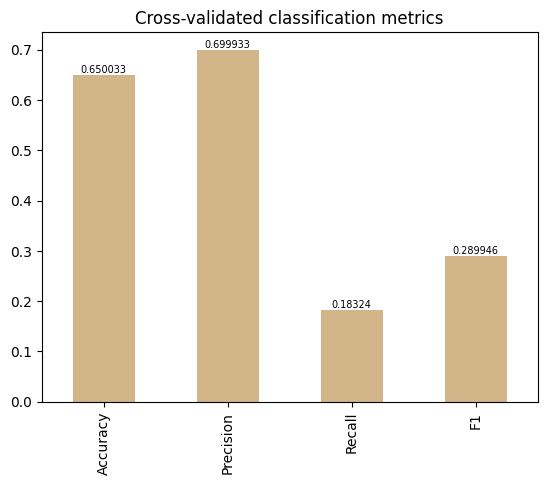

In [313]:
# Visualize cross-validated metrics


ax=cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False,color=hist_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);


In [408]:
# Cross-validated auc-score
cv_auc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="roc_auc", n_jobs=-1)
print(cv_auc)
cv_auc = np.mean(cv_auc)
print('AUC: %.3f' % cv_auc)

[0.58908714 0.62449851 0.60820446 0.59449557 0.58973919]
AUC: 0.601


### Decision Tree

#### Training set

In [394]:
# Hypertuned model
decisiontree=DecisionTreeClassifier(max_depth=10,min_samples_split= 10, random_state=42)
decisiontree.fit(principalComponents_train,y_train)
acc_dt=round(decisiontree.score(principalComponents_train, y_train) * 100, 2)
print(acc_dt)

70.07


In [395]:
predictions = decisiontree.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6808,  372],
       [3155, 1449]])

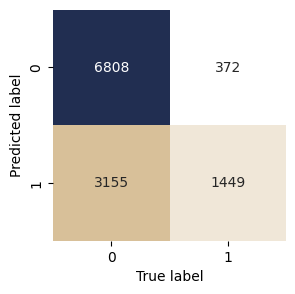

In [396]:
plot_conf_mat(y_train, predictions)

In [356]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.683     0.948     0.794      7180
           1      0.796     0.315     0.451      4604

    accuracy                          0.701     11784
   macro avg      0.740     0.631     0.623     11784
weighted avg      0.727     0.701     0.660     11784



#### Test Set

In [398]:
#Accuracy on the test set
acc_dt_test=round(decisiontree.score(principalComponents_test, y_test) * 100, 2)
print(acc_dt_test)

66.14


In [399]:
predictions = decisiontree.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1685,  200],
       [ 798,  264]])

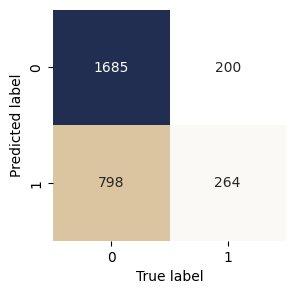

In [400]:
plot_conf_mat(y_test, predictions)

In [401]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.679     0.894     0.772      1885
           1      0.569     0.249     0.346      1062

    accuracy                          0.661      2947
   macro avg      0.624     0.571     0.559      2947
weighted avg      0.639     0.661     0.618      2947



In [364]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.571


####ROC Curve

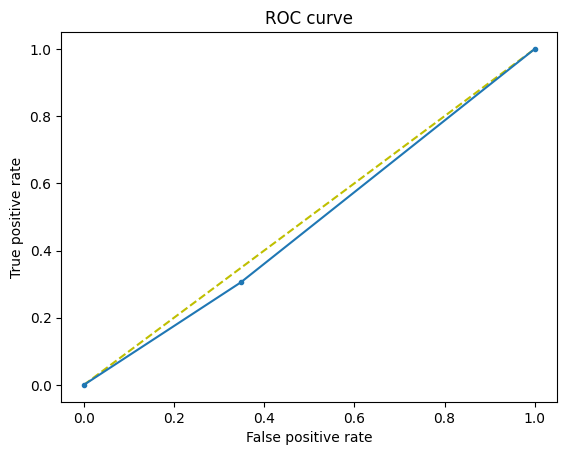

In [184]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

#### Feature Importance

In [185]:
decisiontree.feature_importances_

array([0.04034364, 0.06468673, 0.01773391, 0.02558964, 0.08184498,
       0.1174062 , 0.07347504, 0.09807571, 0.11189412, 0.01284483,
       0.05171191, 0.02606854, 0.02956111, 0.04453113, 0.05454344,
       0.01439291, 0.01601536, 0.03458262, 0.03899843, 0.03271599,
       0.01298375])

In [186]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(decisiontree.feature_importances_)))
feature_dict

{'HomePage': 0.0403436384814697,
 'HomePage_Duration': 0.06468673282513213,
 'LandingPage': 0.017733910385986134,
 'LandingPage_Duration': 0.025589641598343264,
 'ProductDescriptionPage': 0.08184497699225536,
 'ProductDescriptionPage_Duration': 0.11740620022466536,
 'GoogleMetric:Bounce Rates': 0.07347504462589889,
 'GoogleMetric:Exit Rates': 0.09807571398439907,
 'GoogleMetric:Page Values': 0.11189412138810938,
 'SeasonalPurchase': 0.012844830131294335,
 'Month_SeasonalPurchase': 0.05171190798586011,
 'OS': 0.0260685404063953,
 'SearchEngine': 0.029561107544170972,
 'Zone': 0.0445311298303202,
 'Type of Traffic': 0.05454344295248449,
 'CustomerType': 0.014392912319900177,
 'Gender': 0.016015355251717902,
 'Cookies Setting': 0.034582623945995025,
 'Education': 0.038998429207013276,
 'Marital Status': 0.032715993730668816,
 'WeekendPurchase': 0.012983746187920035}

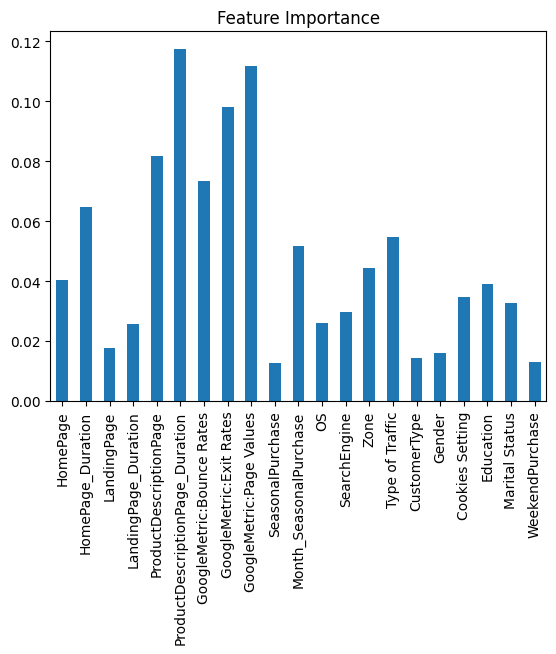

In [187]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

####Cross Validation

In [431]:
# create model
decisiontree = DecisionTreeClassifier(max_depth=10,min_samples_split= 10, random_state=42)
### The right part ###
# define the pipeline to include scaling and the model.
#This pipeline will be the input to cross_val_score, instead of the model.
#steps = list()
#steps.append(('scaler', StandardScaler()))
#steps.append(('model', gaussian))
#pipeline = Pipeline(steps=steps)
pipeline = decisiontree

# cv is already defined previously
#cv = KFold(n_splits=5, random_state=42, shuffle=True)


# evaluate model
cv_scores = cross_val_score(pipeline, principalComponents_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

for score in cv_scores:
    print("Accuracy for this fold is: ", score)

# Mean accuracy
print(' Mean accuracy over all folds is: ', (np.mean(cv_scores)))

Accuracy for this fold is:  0.6134917267713195
Accuracy for this fold is:  0.649554518455664
Accuracy for this fold is:  0.6448875689435724
Accuracy for this fold is:  0.6215528213831141
Accuracy for this fold is:  0.6188455008488964
 Mean accuracy over all folds is:  0.6296664272805133


In [432]:
# Cross-validated accuracy
cv_acc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="accuracy", n_jobs=-1)
cv_acc

array([0.61349173, 0.64955452, 0.64488757, 0.62155282, 0.6188455 ])

In [433]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6296664272805133

In [413]:
# Cross-validated precision
cv_precision = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="precision", n_jobs=-1)
print(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

[0.53494624 0.57360406 0.57559682 0.59036145 0.54566745]


0.5640352015077793

In [414]:
# Cross-validated recall
cv_recall = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="recall", n_jobs=-1)
print(cv_recall)
cv_recall = np.mean(cv_recall)
cv_recall

[0.21237994 0.25565611 0.24272931 0.20588235 0.24866596]


0.23306273183361995

In [415]:
# Cross-validated f1-score
cv_f1 = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="f1", n_jobs=-1)
print(cv_f1)
cv_f1 = np.mean(cv_f1)
cv_f1

[0.30404889 0.35367762 0.34146341 0.30529595 0.34164223]


0.3292256214192708

In [416]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=['Tuned Decision Tree Classifier'])
cv_metrics

,Accuracy,Precision,Recall,F1
Tuned Decision Tree Classifier,0.629666,0.564035,0.233063,0.329226


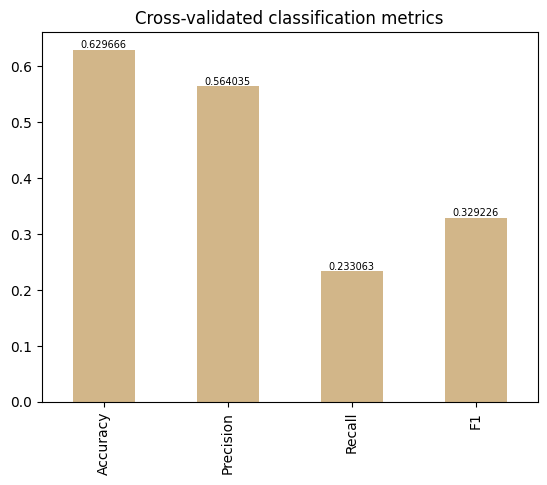

In [417]:
# Visualize cross-validated metrics


ax=cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False,color=hist_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);


In [419]:
# Cross-validated auc-score
cv_auc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="roc_auc", n_jobs=-1)
print(cv_auc)
cv_auc = np.mean(cv_auc)
print('AUC: %.3f' % cv_auc)

[0.54592759 0.56378885 0.5703425  0.53103524 0.53147142]
AUC: 0.549


####Default parameters

In [259]:
# Train with default param
decisiontree_default=DecisionTreeClassifier()
decisiontree_default.fit(principalComponents_train,y_train)
acc_dt_default=round(decisiontree_default.score(principalComponents_train, y_train) * 100, 2)
print(acc_dt_default)

84.28


In [261]:
#Accuracy on the test set
acc_dt_default_test=round(decisiontree_default.score(principalComponents_test, y_test) * 100, 2)
print(acc_dt_default_test)

53.99


###LinearSVC

####Training set

In [366]:
svc=LinearSVC()
svc.fit(principalComponents_train,y_train)
acc_svc=round(svc.score(principalComponents_train, y_train) * 100, 2)
print(acc_svc)

65.08


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [367]:
predictions = svc.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6889,  291],
       [3824,  780]])

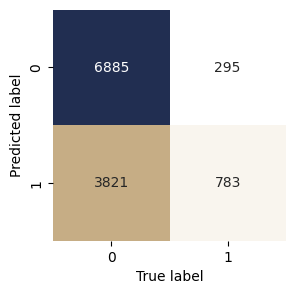

In [197]:
plot_conf_mat(y_train, predictions)

In [198]:
from sklearn import metrics
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.643     0.959     0.770      7180
           1      0.726     0.170     0.276      4604

    accuracy                          0.651     11784
   macro avg      0.685     0.564     0.523     11784
weighted avg      0.676     0.651     0.577     11784



####Test set

In [368]:
# Test set accuracy
acc_svc_test=round(svc.score(principalComponents_test, y_test) * 100, 2)
print(acc_svc_test)

68.0


In [369]:
predictions = svc.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1820,   65],
       [ 878,  184]])

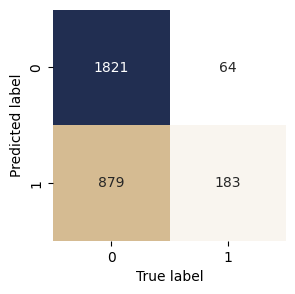

In [201]:
plot_conf_mat(y_test, predictions)

In [202]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.674     0.966     0.794      1885
           1      0.741     0.172     0.280      1062

    accuracy                          0.680      2947
   macro avg      0.708     0.569     0.537      2947
weighted avg      0.698     0.680     0.609      2947



In [370]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.569


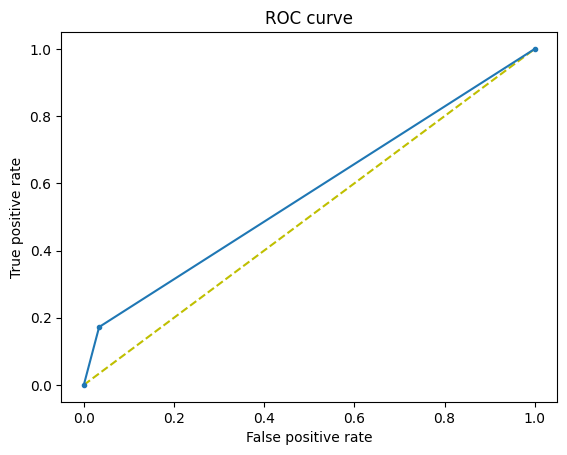

In [203]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

####Feature Importance

In [204]:
svc.coef_

array([[-0.01022809,  0.00548498,  0.01390783, -0.01340563,  0.02502285,
         0.0314914 , -0.00732294, -0.00848757,  0.23980481,  0.00213002,
         0.01489477, -0.00702261,  0.00067231, -0.01071256, -0.00321685,
        -0.02268996,  0.00958173,  0.00304156,  0.01081313,  0.0041296 ,
         0.00529273]])

In [205]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(svc.coef_[0])))
feature_dict

{'HomePage': -0.010228085588967218,
 'HomePage_Duration': 0.005484978767853143,
 'LandingPage': 0.01390782810032033,
 'LandingPage_Duration': -0.013405625436250217,
 'ProductDescriptionPage': 0.025022850550149755,
 'ProductDescriptionPage_Duration': 0.031491404169248935,
 'GoogleMetric:Bounce Rates': -0.00732293911576685,
 'GoogleMetric:Exit Rates': -0.008487565324337976,
 'GoogleMetric:Page Values': 0.23980481167350065,
 'SeasonalPurchase': 0.0021300217075692963,
 'Month_SeasonalPurchase': 0.014894769219930028,
 'OS': -0.007022611285781765,
 'SearchEngine': 0.0006723110296569065,
 'Zone': -0.010712560486085598,
 'Type of Traffic': -0.0032168475972422545,
 'CustomerType': -0.0226899634289591,
 'Gender': 0.009581727954260011,
 'Cookies Setting': 0.00304156479395318,
 'Education': 0.01081312723574139,
 'Marital Status': 0.004129602660726644,
 'WeekendPurchase': 0.005292730680546396}

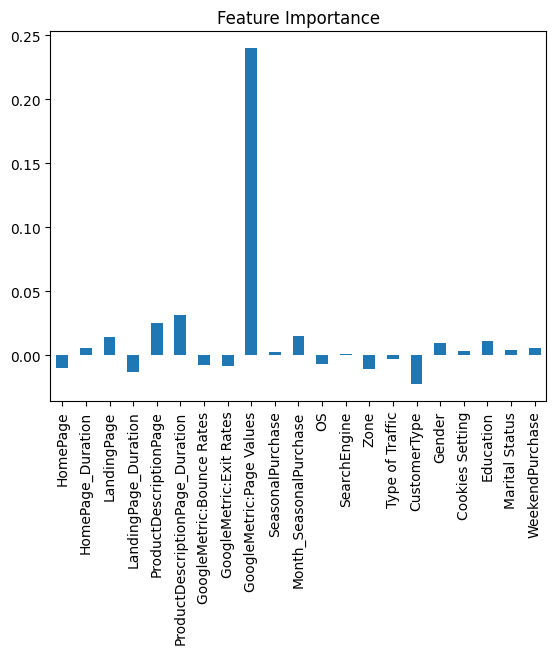

In [206]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

####Cross Validation

In [420]:
# create model
svc = LinearSVC()
### The right part ###
# define the pipeline to include scaling and the model.
#This pipeline will be the input to cross_val_score, instead of the model.
#steps = list()
#steps.append(('scaler', StandardScaler()))
#steps.append(('model', gaussian))
#pipeline = Pipeline(steps=steps)
pipeline = svc

# cv is already defined previously
#cv = KFold(n_splits=5, random_state=42, shuffle=True)


# evaluate model
cv_scores = cross_val_score(pipeline, principalComponents_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

for score in cv_scores:
    print("Accuracy for this fold is: ", score)

# Mean accuracy
print(' Mean accuracy over all folds is: ', (np.mean(cv_scores)))

Accuracy for this fold is:  0.6385235468816292
Accuracy for this fold is:  0.663555366991939
Accuracy for this fold is:  0.6605854900296988
Accuracy for this fold is:  0.6355536699193891
Accuracy for this fold is:  0.6464346349745331
 Mean accuracy over all folds is:  0.6489305417594379


In [324]:
# Cross-validated accuracy
cv_acc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="accuracy",n_jobs=-1)
cv_acc

array([0.63937208, 0.66355537, 0.66100976, 0.63555367, 0.64643463])

In [325]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6491851026419156

In [326]:
# Cross-validated precision
cv_precision = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="precision",n_jobs=-1)
print(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

[0.73369565 0.7        0.71818182 0.72772277 0.7125    ]


0.7184200485265918

In [327]:
# Cross-validated recall
cv_recall = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="recall",n_jobs=-1)
print(cv_recall)
cv_recall = np.mean(cv_recall)
cv_recall

[0.14407684 0.17873303 0.17673378 0.1512605  0.1814301 ]


0.1664468507339199

In [328]:
# Cross-validated f1-score
cv_f1 = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="f1",n_jobs=-1)
print(cv_f1)
cv_f1 = np.mean(cv_f1)
cv_f1

[0.24085638 0.28494139 0.28290063 0.25520833 0.29106383]


0.27099411133426077

In [329]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=['LinearSVC'])
cv_metrics

,Accuracy,Precision,Recall,F1
LinearSVC,0.649185,0.71842,0.166447,0.270994


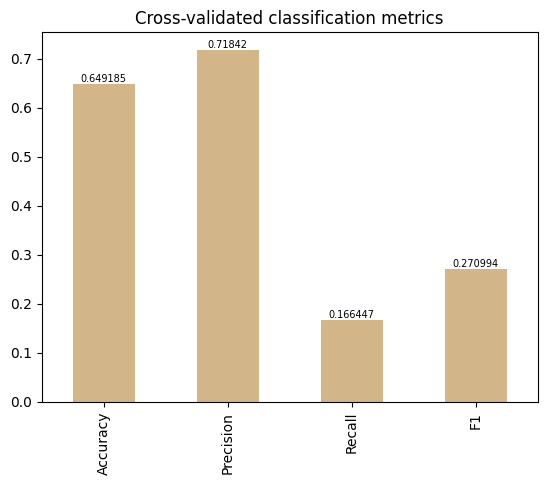

In [330]:
# Visualize cross-validated metrics


ax=cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False,color=hist_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);


In [421]:
# Cross-validated auc-score
cv_auc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="roc_auc", n_jobs=-1)
print(cv_auc)
cv_auc = np.mean(cv_auc)
print('AUC: %.3f' % cv_auc)

[0.58742992 0.62257628 0.60548412 0.59531049 0.58932704]
AUC: 0.600


### XGBoost

In [214]:
!sudo pip install xgboost

In [215]:
!sudo pip install --upgrade xgboost

####Training Set

In [373]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(principalComponents_train,y_train)
acc_xgb=round(xgb.score(principalComponents_train, y_train) * 100, 2)
print(f"Accuracy on the train data:{acc_xgb}")

Accuracy on the train data:77.28


####Test Set

In [374]:
xgb.score(principalComponents_test, y_test)
acc_xgb_test = round(xgb.score(principalComponents_test, y_test) * 100, 2)
print(f"accuracy on the test data:{acc_xgb_test}")

accuracy on the test data:64.98


In [375]:
predictions = xgb.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6888,  292],
       [2385, 2219]])

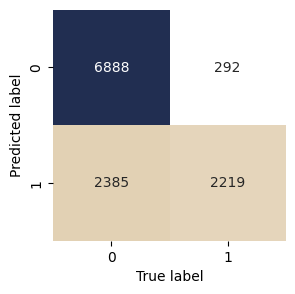

In [219]:
plot_conf_mat(y_train, predictions)

In [220]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.743     0.959     0.837      7180
           1      0.884     0.482     0.624      4604

    accuracy                          0.773     11784
   macro avg      0.813     0.721     0.731     11784
weighted avg      0.798     0.773     0.754     11784



In [378]:
predictions = xgb.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1648,  237],
       [ 795,  267]])

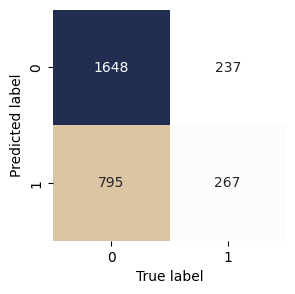

In [222]:
plot_conf_mat(y_test, predictions)

In [223]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.675     0.874     0.762      1885
           1      0.530     0.251     0.341      1062

    accuracy                          0.650      2947
   macro avg      0.602     0.563     0.551      2947
weighted avg      0.622     0.650     0.610      2947



In [379]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.563


####Feature Importance

In [224]:
xgb.feature_importances_

array([0.04756476, 0.04919896, 0.03359568, 0.03930444, 0.04444176,
       0.04211906, 0.051858  , 0.04469461, 0.17888284, 0.04319304,
       0.04537157, 0.03953187, 0.04264408, 0.03851692, 0.04021066,
       0.0383927 , 0.03566469, 0.03947077, 0.03484601, 0.03301589,
       0.03748179], dtype=float32)

In [225]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(xgb.feature_importances_)))
feature_dict

{'HomePage': 0.047564764,
 'HomePage_Duration': 0.049198955,
 'LandingPage': 0.03359568,
 'LandingPage_Duration': 0.039304435,
 'ProductDescriptionPage': 0.044441763,
 'ProductDescriptionPage_Duration': 0.042119056,
 'GoogleMetric:Bounce Rates': 0.051858,
 'GoogleMetric:Exit Rates': 0.044694614,
 'GoogleMetric:Page Values': 0.17888284,
 'SeasonalPurchase': 0.04319304,
 'Month_SeasonalPurchase': 0.045371566,
 'OS': 0.039531868,
 'SearchEngine': 0.042644083,
 'Zone': 0.03851692,
 'Type of Traffic': 0.04021066,
 'CustomerType': 0.038392697,
 'Gender': 0.03566469,
 'Cookies Setting': 0.039470773,
 'Education': 0.034846008,
 'Marital Status': 0.033015892,
 'WeekendPurchase': 0.037481792}

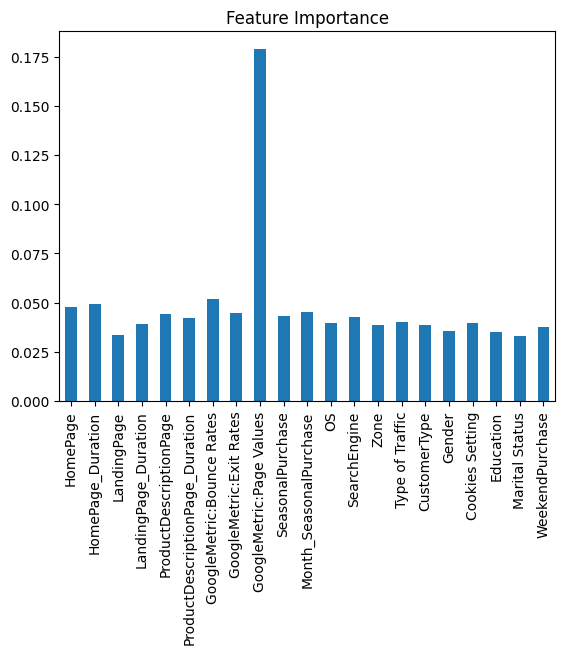

In [226]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

####Cross Validation

In [422]:
# create model
xgb=XGBClassifier()
### The right part ###
# define the pipeline to include scaling and the model.
#This pipeline will be the input to cross_val_score, instead of the model.
#steps = list()
#steps.append(('scaler', StandardScaler()))
#steps.append(('model', gaussian))
#pipeline = Pipeline(steps=steps)
pipeline = xgb

# cv is already defined previously
#cv = KFold(n_splits=5, random_state=42, shuffle=True)


# evaluate model
cv_scores = cross_val_score(pipeline, principalComponents_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

for score in cv_scores:
    print("Accuracy for this fold is: ", score)

# Mean accuracy
print(' Mean accuracy over all folds is: ', (np.mean(cv_scores)))

Accuracy for this fold is:  0.5680950360627917
Accuracy for this fold is:  0.59439966058549
Accuracy for this fold is:  0.5871871022486211
Accuracy for this fold is:  0.5782774713619008
Accuracy for this fold is:  0.5704584040747029
 Mean accuracy over all folds is:  0.5796835348667013


In [332]:
# Cross-validated accuracy
cv_acc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="accuracy",n_jobs=-1)
cv_acc

array([0.56809504, 0.59439966, 0.5871871 , 0.57827747, 0.5704584 ])

In [333]:
cv_acc = np.mean(cv_acc)
cv_acc

0.5796835348667013

In [334]:
# Cross-validated precision
cv_precision = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="precision",n_jobs=-1)
print(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

[0.41883768 0.44039735 0.43130435 0.45961538 0.43697479]


0.4374259097403034

In [335]:
# Cross-validated recall
cv_recall = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="recall",n_jobs=-1)
print(cv_recall)
cv_recall = np.mean(cv_recall)
cv_recall

[0.22305229 0.30090498 0.27740492 0.25105042 0.27748132]


0.26597878743468384

In [336]:
# Cross-validated f1-score
cv_f1 = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="f1",n_jobs=-1)
print(cv_f1)
cv_f1 = np.mean(cv_f1)
cv_f1

[0.29108635 0.35752688 0.33764466 0.32472826 0.33942559]


0.33008234745220316

In [337]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=['XGBoost'])
cv_metrics

,Accuracy,Precision,Recall,F1
XGBoost,0.579684,0.437426,0.265979,0.330082


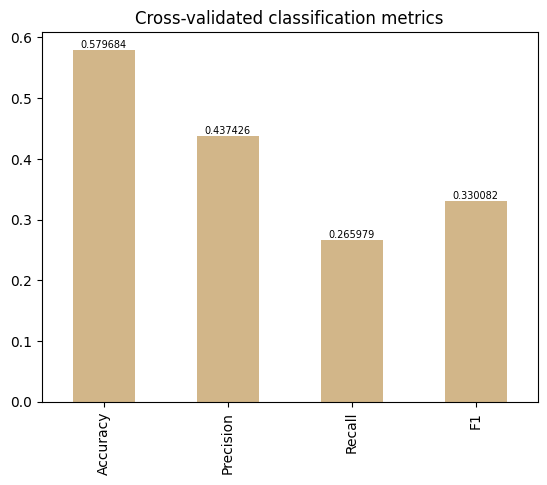

In [233]:
# Visualize cross-validated metrics

ax=cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False,color=hist_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);


In [423]:
# Cross-validated auc-score
cv_auc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="roc_auc", n_jobs=-1)
print(cv_auc)
cv_auc = np.mean(cv_auc)
print('AUC: %.3f' % cv_auc)

[0.45481346 0.49834886 0.49728692 0.48112533 0.47413551]
AUC: 0.481


### Catboost

In [381]:
!sudo pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.4 MB/s eta 0:00:00


####Training Set

In [382]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier()

In [383]:
cb.fit(principalComponents_train,y_train)
acc_cb=round(cb.score(principalComponents_train, y_train) * 100, 2)
print(f"Accuracy on the train data:{acc_cb}")

Learning rate set to 0.029538
0:	learn: 0.6894764	total: 56.1ms	remaining: 56.1s
1:	learn: 0.6861326	total: 63.7ms	remaining: 31.8s
2:	learn: 0.6830640	total: 71.9ms	remaining: 23.9s
3:	learn: 0.6798615	total: 79.1ms	remaining: 19.7s
4:	learn: 0.6769693	total: 85.8ms	remaining: 17.1s
5:	learn: 0.6741337	total: 92.8ms	remaining: 15.4s
6:	learn: 0.6717517	total: 99.6ms	remaining: 14.1s
7:	learn: 0.6692770	total: 109ms	remaining: 13.5s
8:	learn: 0.6670329	total: 116ms	remaining: 12.8s
9:	learn: 0.6649641	total: 123ms	remaining: 12.1s
10:	learn: 0.6628919	total: 130ms	remaining: 11.6s
11:	learn: 0.6608153	total: 136ms	remaining: 11.2s
12:	learn: 0.6589265	total: 144ms	remaining: 10.9s
13:	learn: 0.6571416	total: 151ms	remaining: 10.6s
14:	learn: 0.6554067	total: 157ms	remaining: 10.3s
15:	learn: 0.6539957	total: 164ms	remaining: 10.1s
16:	learn: 0.6525330	total: 171ms	remaining: 9.89s
17:	learn: 0.6510857	total: 179ms	remaining: 9.77s
18:	learn: 0.6498554	total: 186ms	remaining: 9.62s
19:	

####Test Set

In [384]:
cb.score(principalComponents_test, y_test)
acc_cb_test = round(cb.score(principalComponents_test, y_test) * 100, 2)
print(f"accuracy on the test data:{acc_cb_test}")

accuracy on the test data:66.58


In [385]:
predictions = cb.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6879,  301],
       [2999, 1605]])

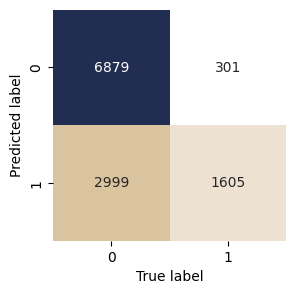

In [239]:
plot_conf_mat(y_train, predictions)

In [240]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.696     0.958     0.807      7180
           1      0.842     0.349     0.493      4604

    accuracy                          0.720     11784
   macro avg      0.769     0.653     0.650     11784
weighted avg      0.753     0.720     0.684     11784



In [386]:
predictions = cb.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1679,  206],
       [ 779,  283]])

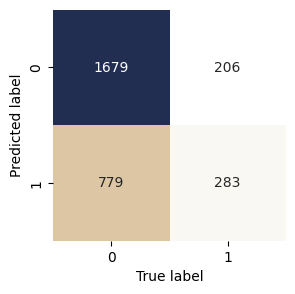

In [242]:
plot_conf_mat(y_test, predictions)

In [243]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.683     0.891     0.773      1885
           1      0.579     0.266     0.365      1062

    accuracy                          0.666      2947
   macro avg      0.631     0.579     0.569      2947
weighted avg      0.645     0.666     0.626      2947



In [387]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.579


####Feature Importance

In [244]:
cb.feature_importances_

array([ 4.47273307,  6.73631407,  1.76025093,  3.29615915,  7.96051501,
        8.93224057,  6.03046045,  8.12260565, 18.76559064,  1.12704862,
        5.26767529,  2.42261124,  2.41659512,  4.63438954,  4.14347499,
        2.02754349,  2.50702211,  2.77363694,  2.51926741,  2.26481845,
        1.81904727])

In [245]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(cb.feature_importances_)))
feature_dict

{'HomePage': 4.472733074752002,
 'HomePage_Duration': 6.736314070953717,
 'LandingPage': 1.7602509314218977,
 'LandingPage_Duration': 3.2961591494476274,
 'ProductDescriptionPage': 7.960515006066917,
 'ProductDescriptionPage_Duration': 8.932240565835608,
 'GoogleMetric:Bounce Rates': 6.030460451123074,
 'GoogleMetric:Exit Rates': 8.122605651919258,
 'GoogleMetric:Page Values': 18.765590638338082,
 'SeasonalPurchase': 1.1270486244401183,
 'Month_SeasonalPurchase': 5.2676752859763,
 'OS': 2.4226112376409206,
 'SearchEngine': 2.4165951163355808,
 'Zone': 4.634389535946934,
 'Type of Traffic': 4.143474987702668,
 'CustomerType': 2.0275434860491925,
 'Gender': 2.5070221126024017,
 'Cookies Setting': 2.77363693727407,
 'Education': 2.5192674141287736,
 'Marital Status': 2.2648184485284424,
 'WeekendPurchase': 1.8190472735164365}

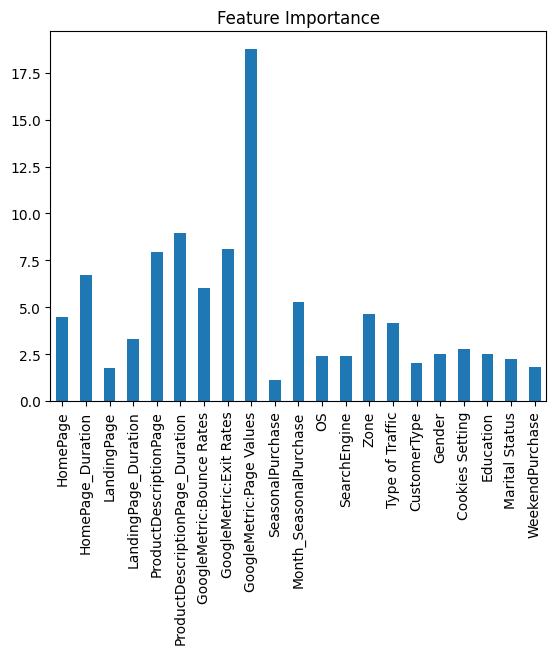

In [246]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

####Cross Validation

In [424]:
# create model
cb= CatBoostClassifier()
# define the pipeline to include scaling and the model.
#This pipeline will be the input to cross_val_score, instead of the model.
#steps = list()
#steps.append(('scaler', StandardScaler()))
#steps.append(('model', gaussian))
#pipeline = Pipeline(steps=steps)
pipeline = cb

# cv is already defined previously
#cv = KFold(n_splits=5, random_state=42, shuffle=True)


# evaluate model
cv_scores = cross_val_score(pipeline, principalComponents_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

for score in cv_scores:
    print("Accuracy for this fold is: ", score)

# Mean accuracy
print(' Mean accuracy over all folds is: ', (np.mean(cv_scores)))

Accuracy for this fold is:  0.621977089520577
Accuracy for this fold is:  0.6580398812049215
Accuracy for this fold is:  0.6406448875689436
Accuracy for this fold is:  0.6296139159949088
Accuracy for this fold is:  0.634974533106961
 Mean accuracy over all folds is:  0.6370500614792624


In [339]:
# Cross-validated accuracy
cv_acc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="accuracy",n_jobs=-1)
cv_acc

array([0.62197709, 0.65803988, 0.64064489, 0.62961392, 0.63497453])

In [340]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6370500614792624

In [341]:
# Cross-validated precision
cv_precision = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="precision",n_jobs=-1)
print(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

[0.57142857 0.59375    0.55477855 0.60821918 0.59058824]


0.583752907916687

In [342]:
# Cross-validated recall
cv_recall = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="recall",n_jobs=-1)
print(cv_recall)
cv_recall = np.mean(cv_recall)
cv_recall

[0.1963714  0.27941176 0.26621924 0.23319328 0.2678762 ]


0.24861437602194508

In [343]:
# Cross-validated f1-score
cv_f1 = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="f1",n_jobs=-1)
print(cv_f1)
cv_f1 = np.mean(cv_f1)
cv_f1

[0.29229547 0.38       0.35978836 0.33712984 0.36857562]


0.34755785940291767

In [344]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=['Catboost'])
cv_metrics

,Accuracy,Precision,Recall,F1
Catboost,0.63705,0.583753,0.248614,0.347558


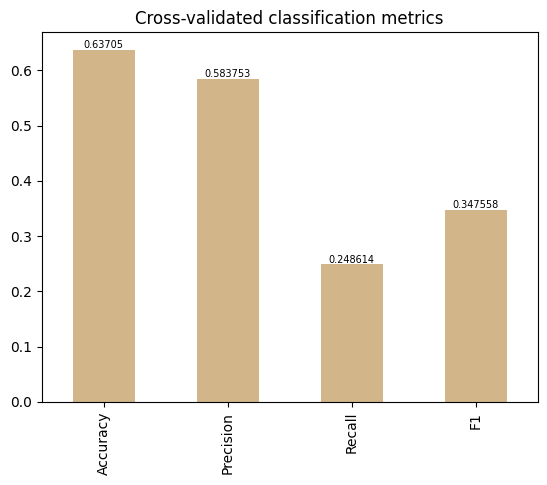

In [345]:
# Visualize cross-validated metrics

ax=cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False,color=hist_color)
ax.bar_label(ax.containers[0],fontsize=7);
ax.grid(False);


In [425]:
# Cross-validated auc-score
cv_auc = cross_val_score(pipeline,
                         principalComponents_train,
                         y_train,
                         cv=cv,
                         scoring="roc_auc", n_jobs=-1)
print(cv_auc)
cv_auc = np.mean(cv_auc)
print('AUC: %.3f' % cv_auc)

[0.48870083 0.54395522 0.52476447 0.5248673  0.51564339]
AUC: 0.520


### Score Comparison

In [265]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'GaussianNB',
              'Decision Tree',
              'LinearSVC',
               'XGBoost',
               'CatBoost',
                'Tuned Random Forest',
               'Tuned Decision Tree'
              ],
    'Training_Score': [ acc_log, acc_random_forest_default, acc_gaussian, acc_dt_default ,acc_svc,acc_xgb,acc_cb,acc_random_forest,acc_dt],
     'Testing_Score': [ acc_log_test, acc_random_forest_default_test, acc_gaussian_test, acc_dt_default_test ,acc_svc_test,acc_xgb_test,acc_cb_test,acc_random_forest_test,acc_dt_test]})
result_df = results.sort_values(by='Testing_Score', ascending=False,)
result_df = result_df.set_index('Model')
result_df

,Training_Score,Testing_Score
Model,,
Hypertuned Random Forest,70.09,68.65
Logistic Regression,65.15,68.04
LinearSVC,65.07,68.00
GaussianNB,63.56,66.68
CatBoost,72.00,66.58
Hypertuned Decision Tree,70.07,66.14
XGBoost,77.28,64.98
Decision Tree,84.28,53.99
Random Forest,84.28,53.75
